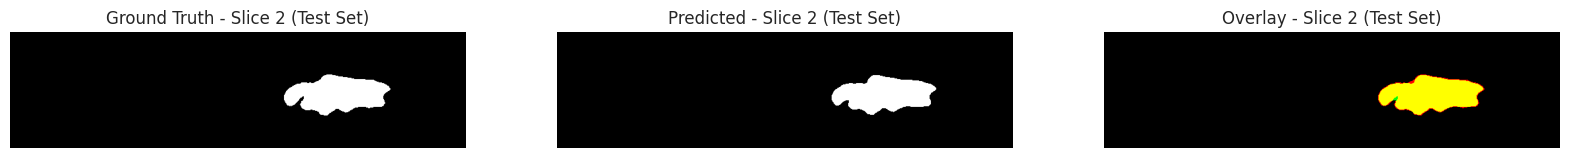

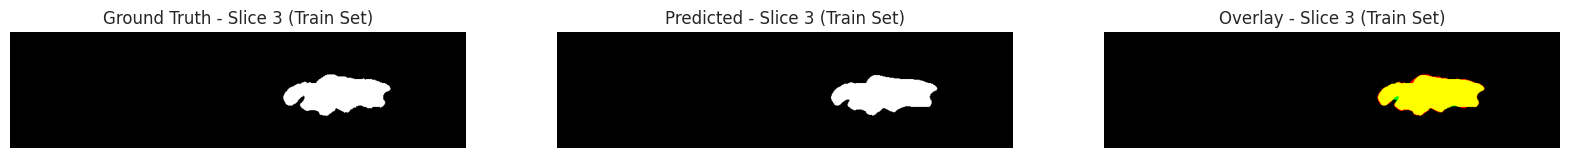

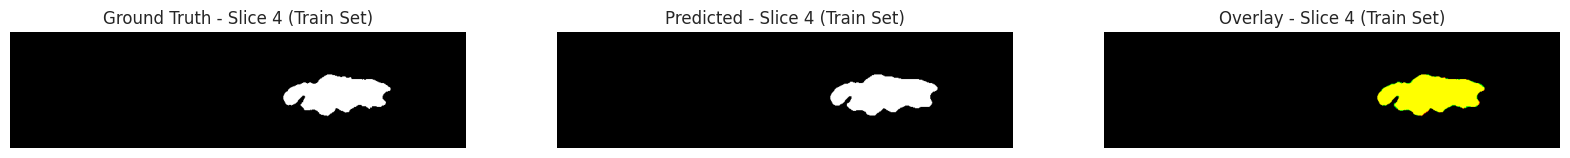

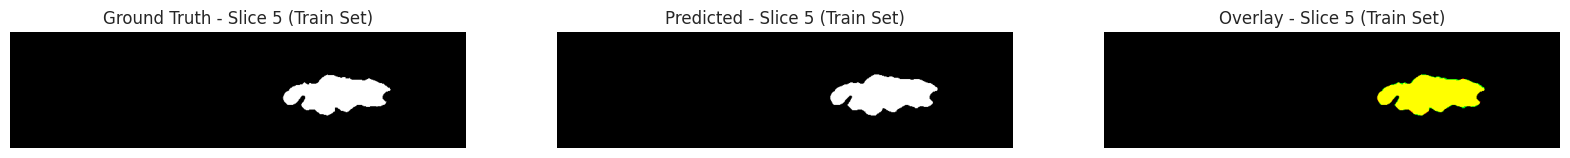

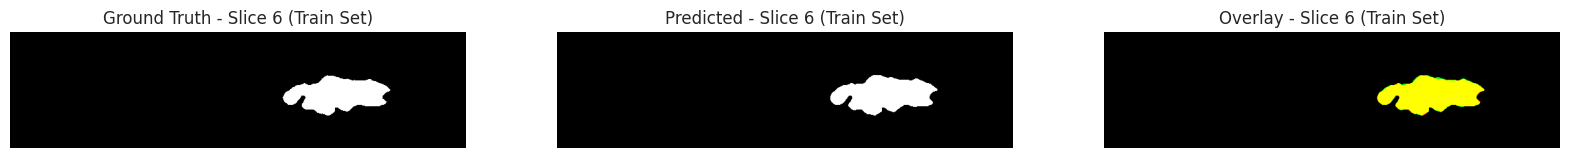

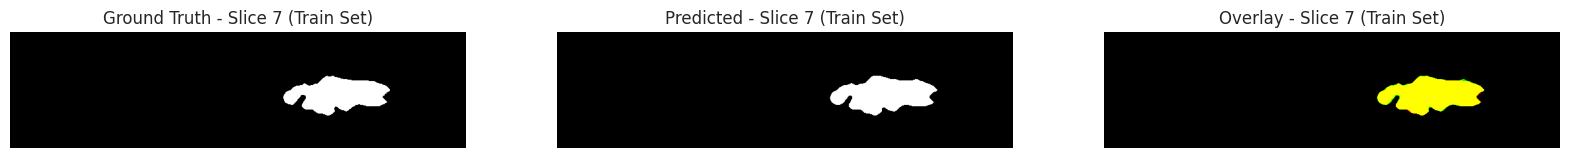

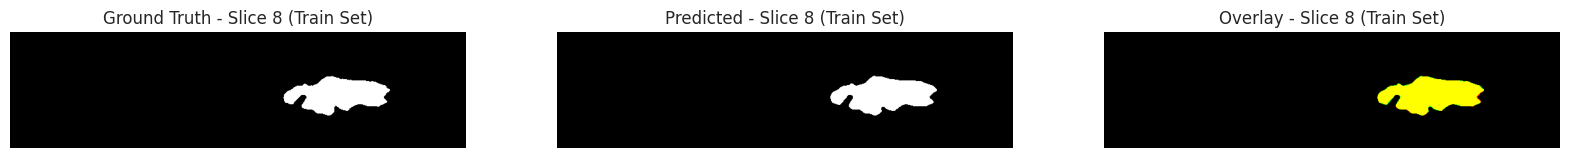

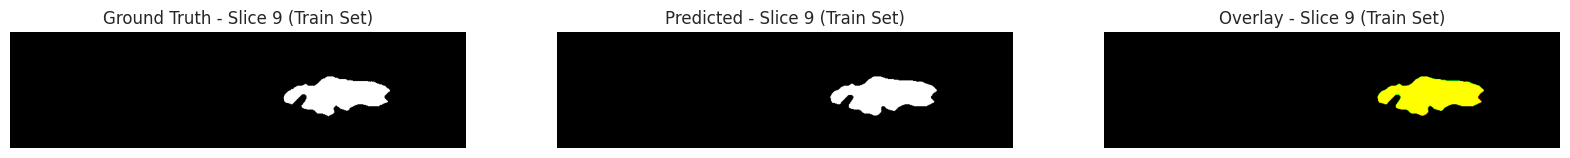

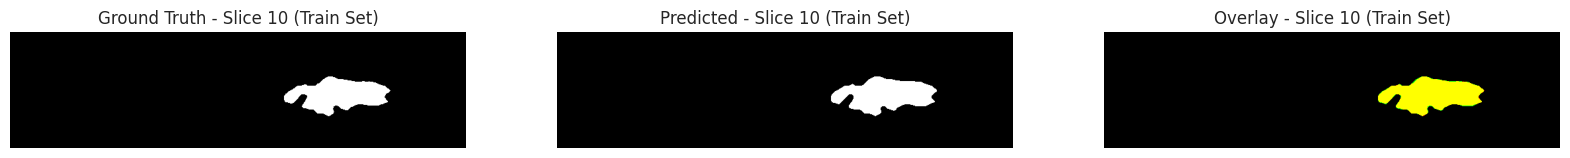

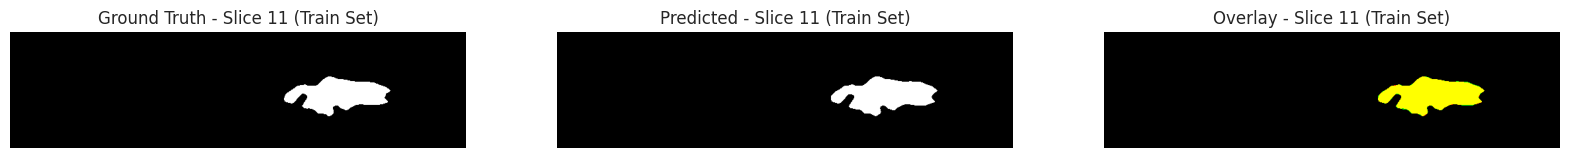

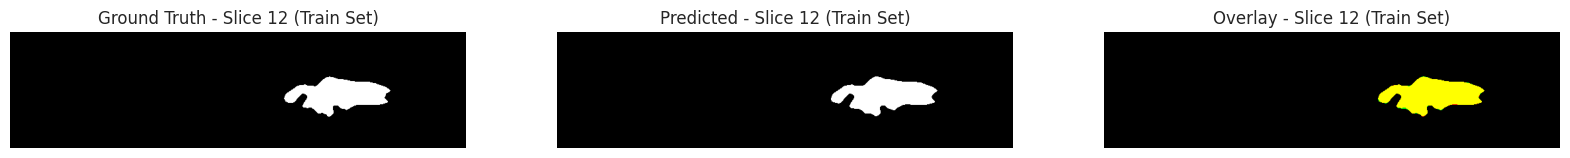

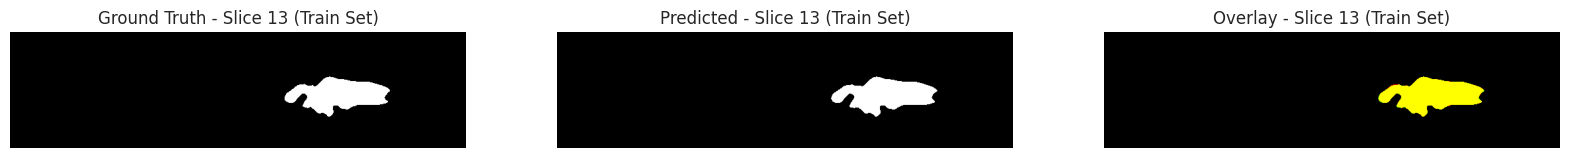

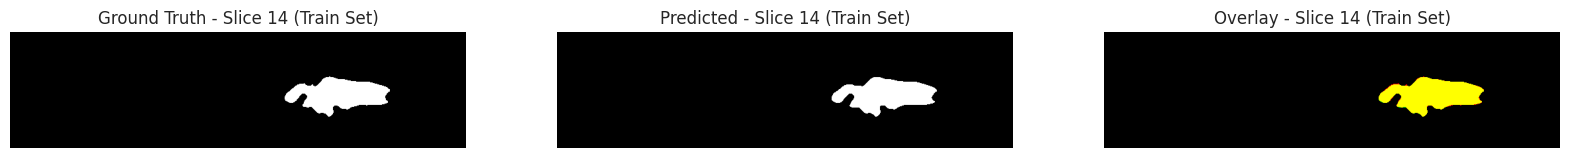

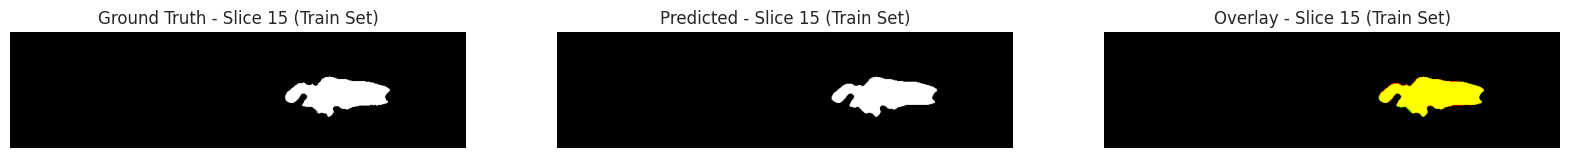

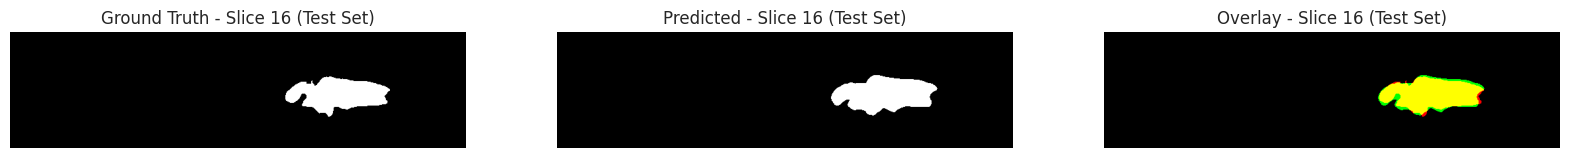

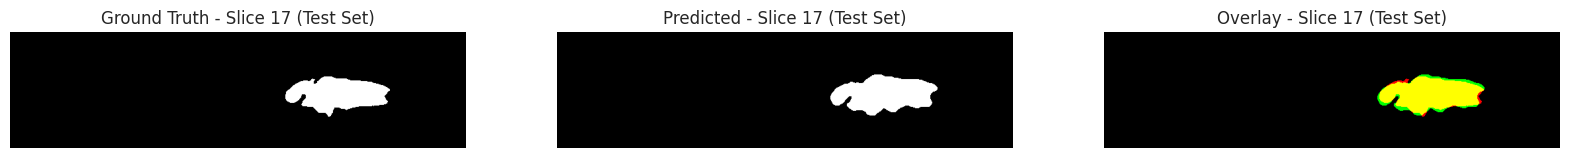

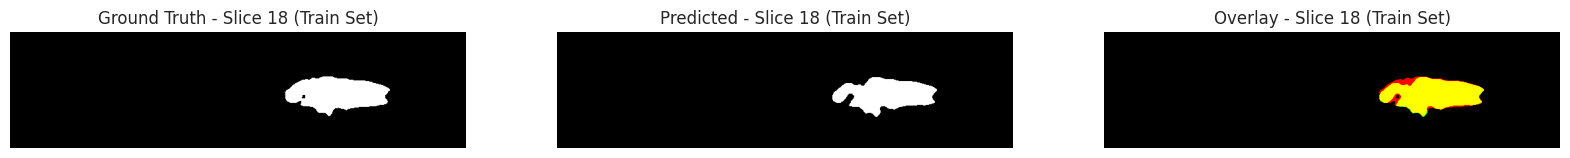

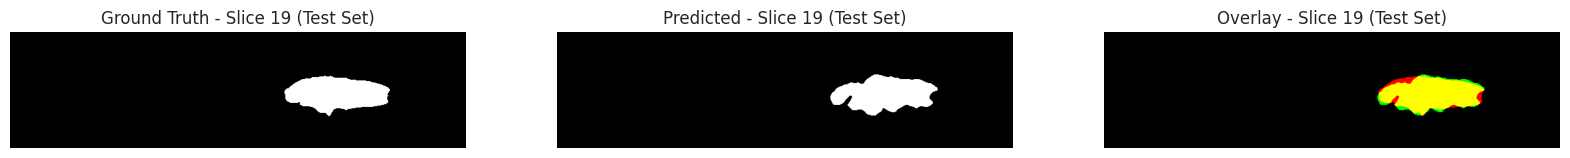

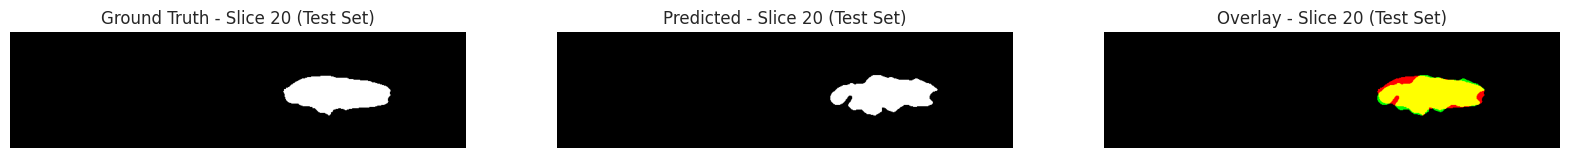

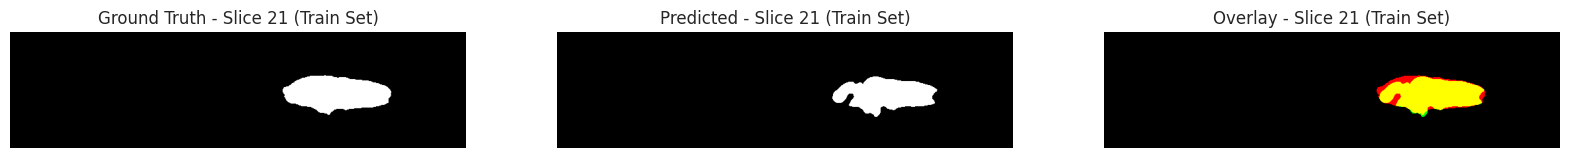

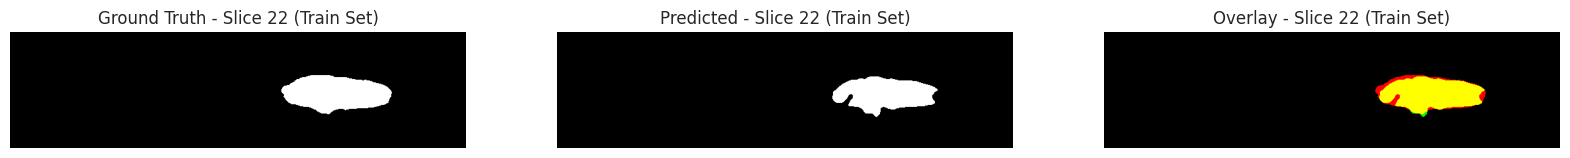

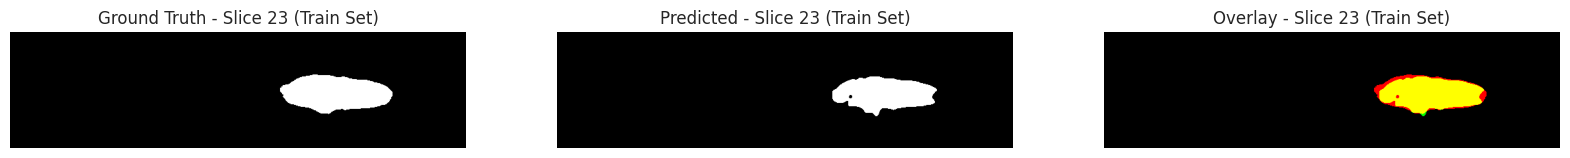

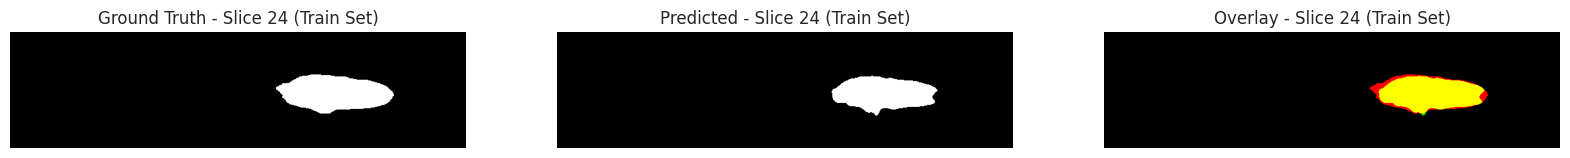

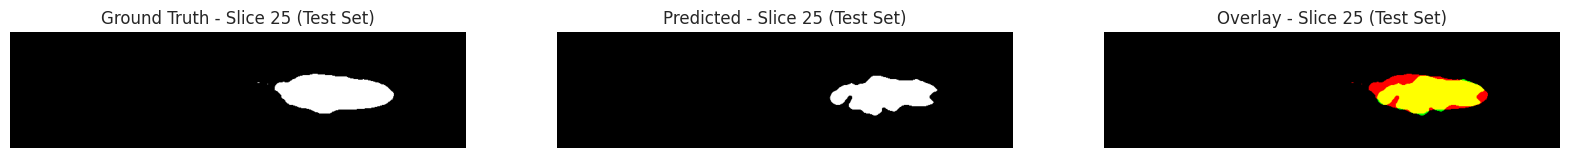

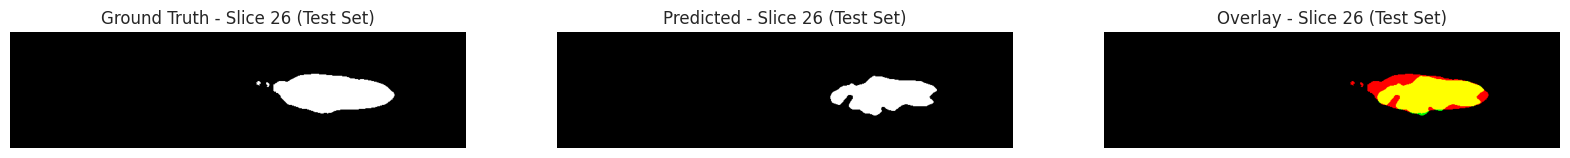

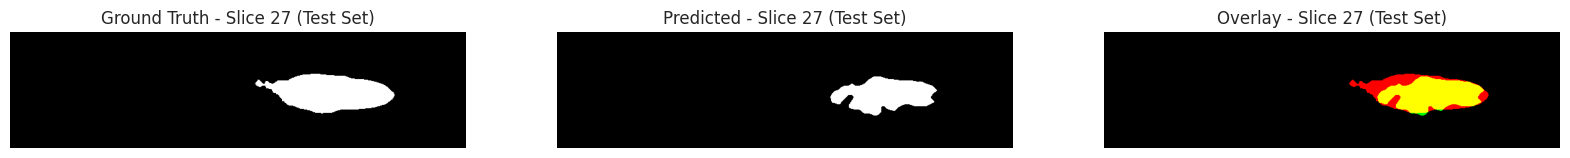

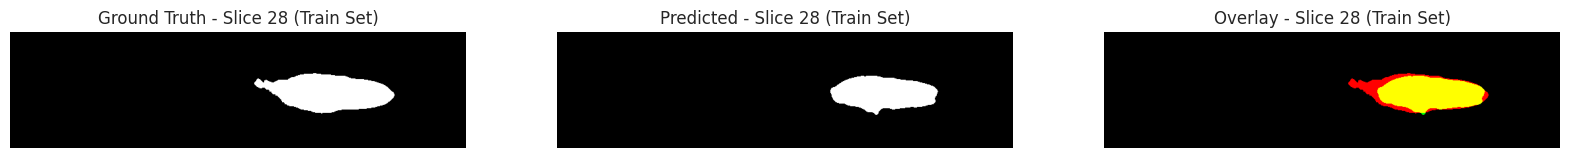

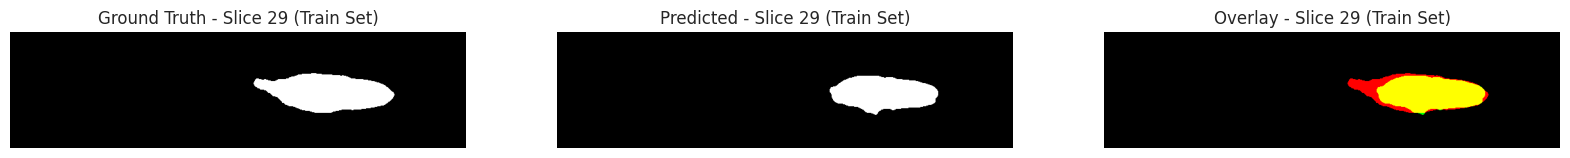

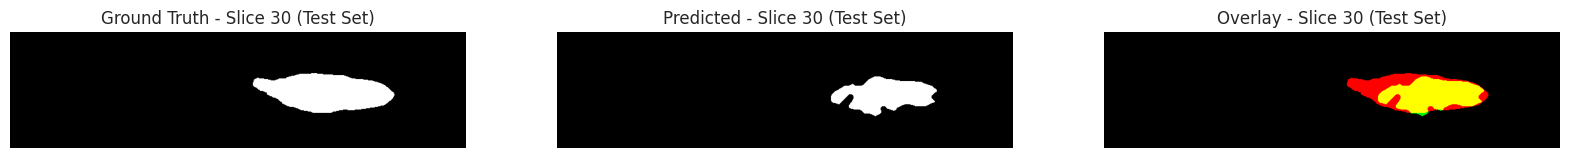

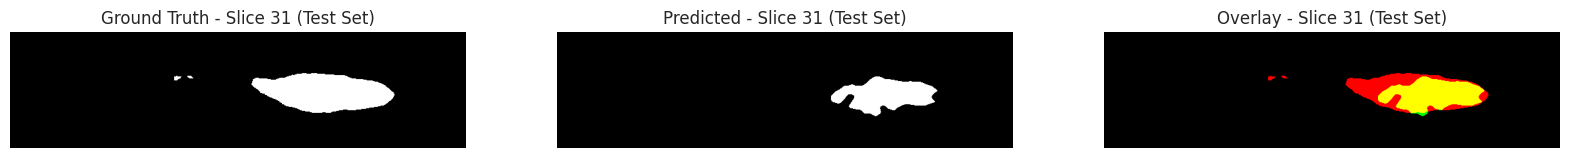

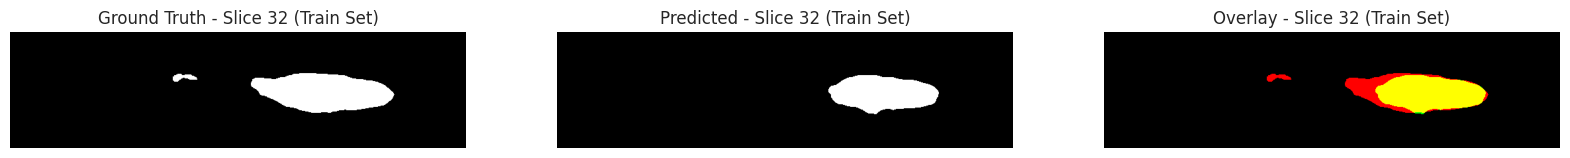

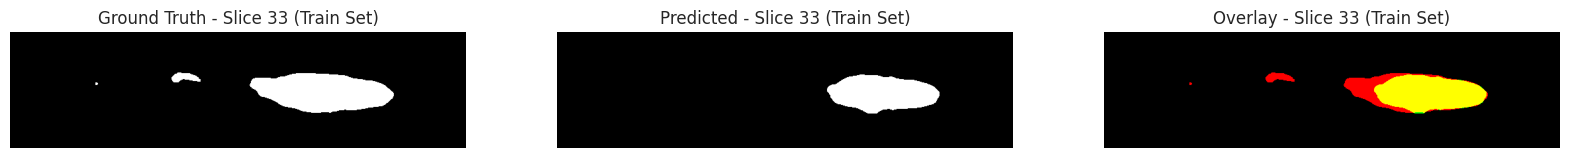

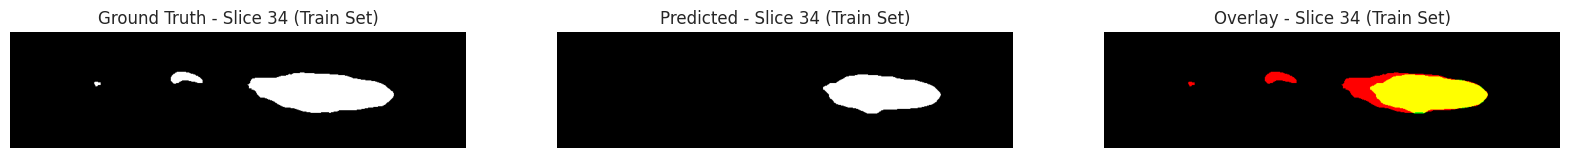

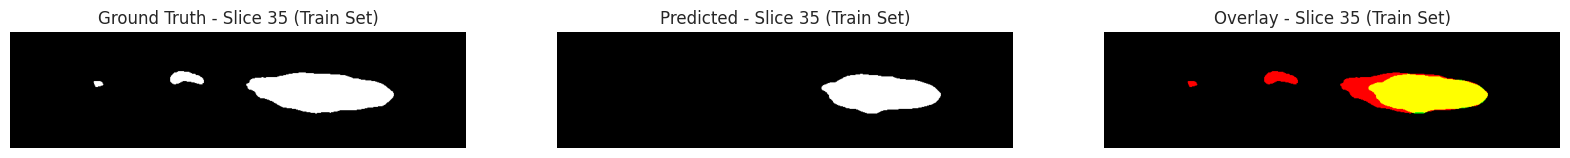

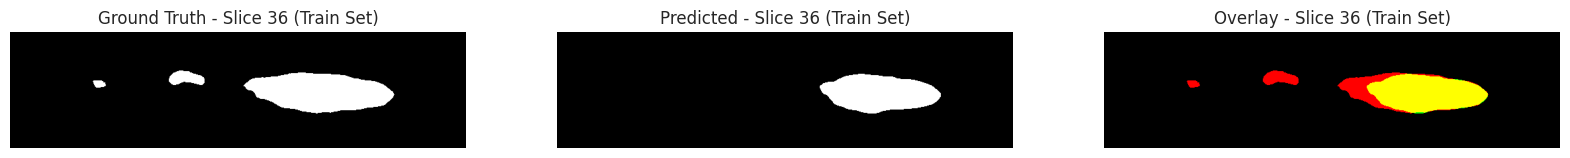

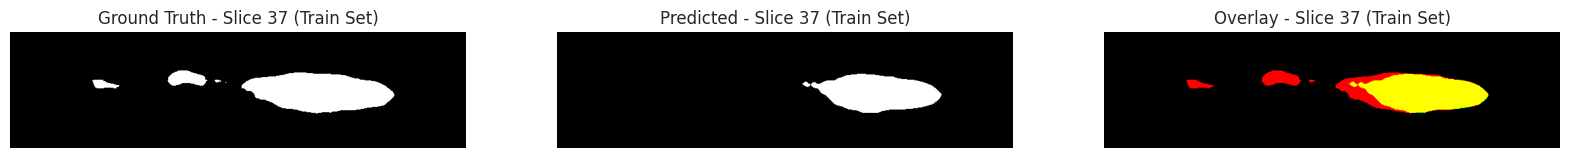

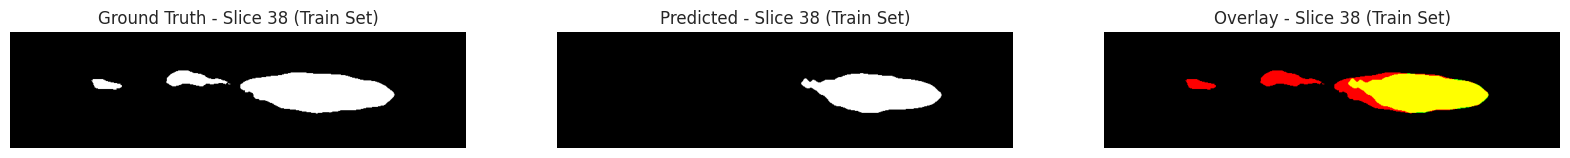

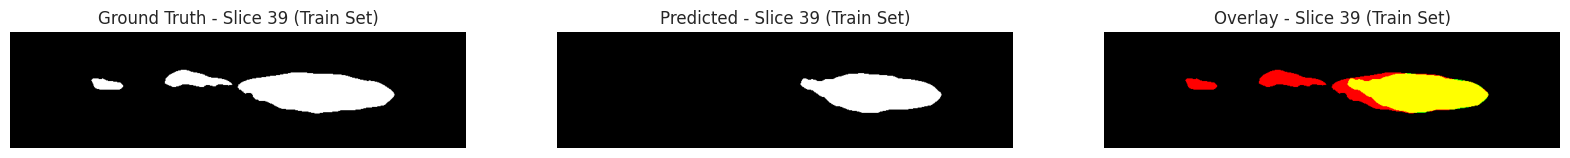

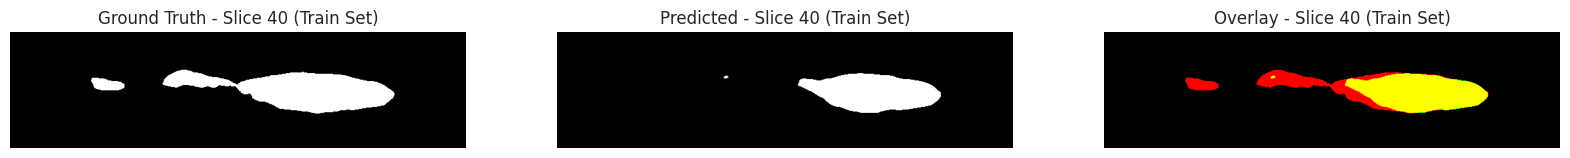

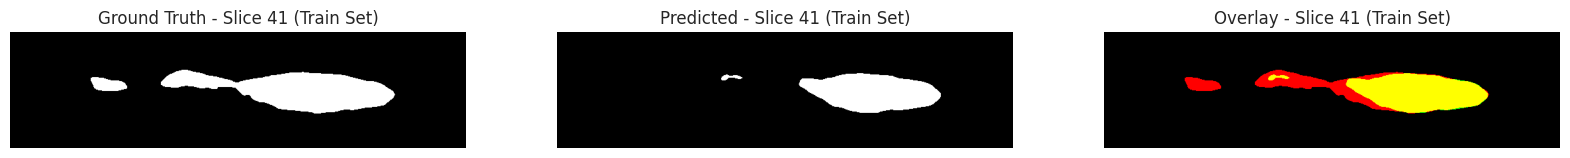

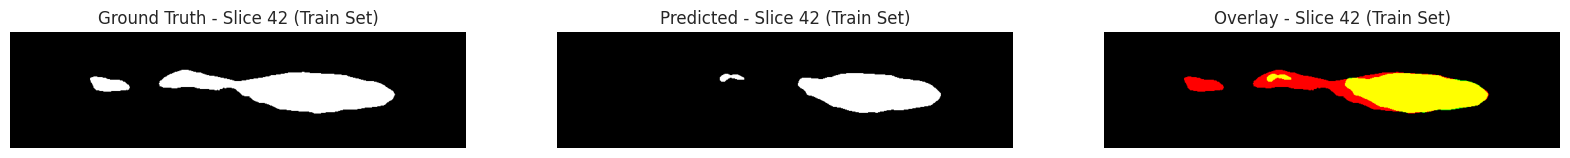

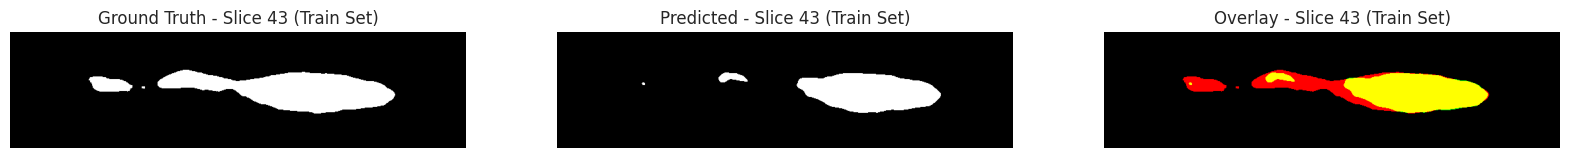

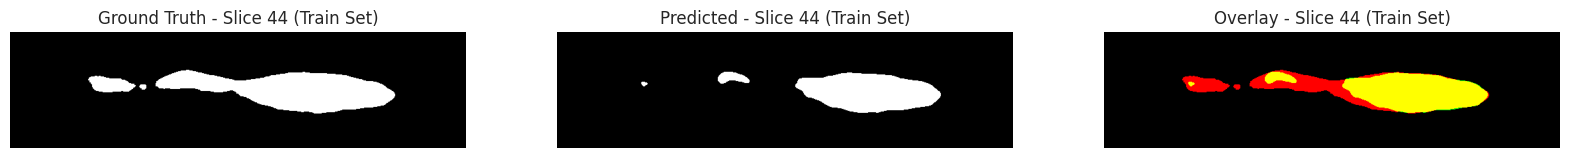

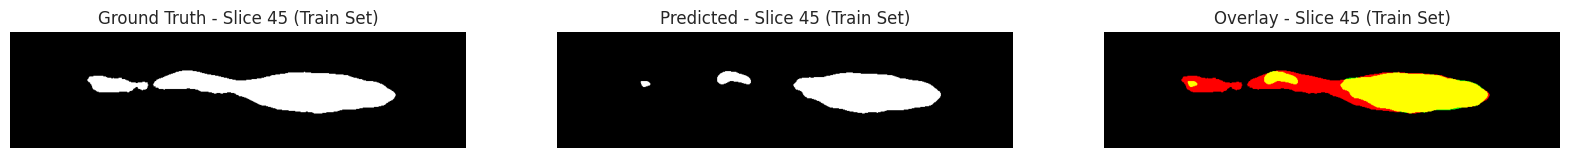

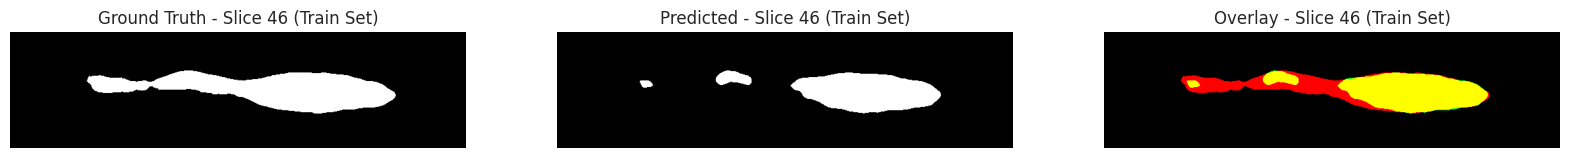

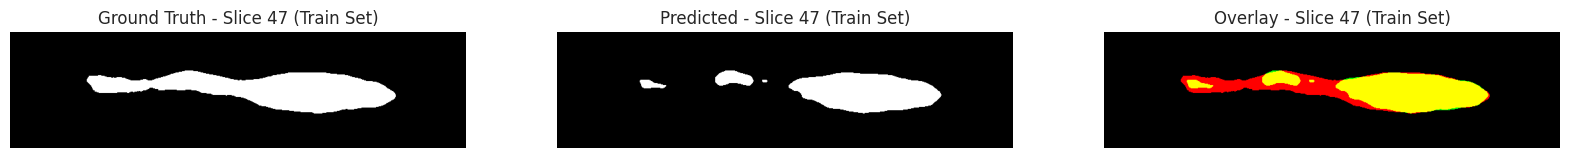

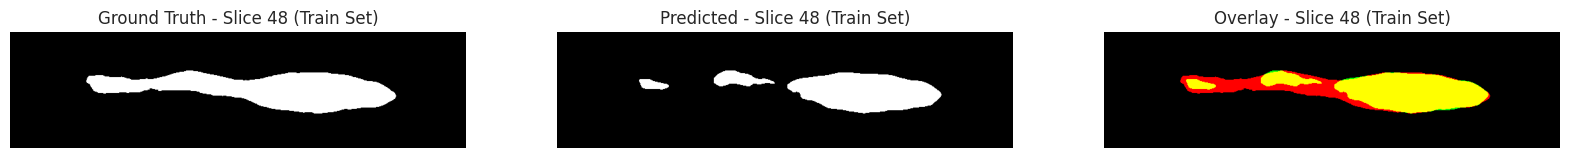

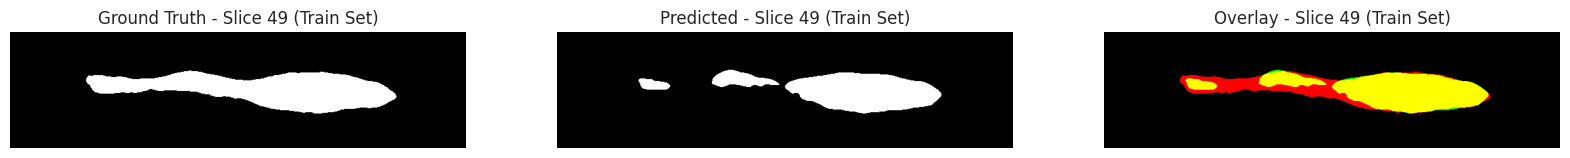

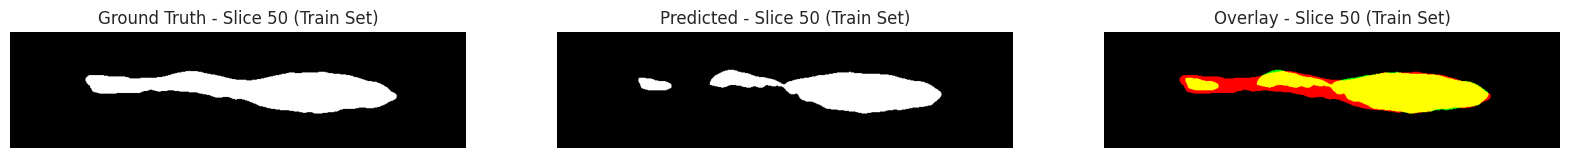

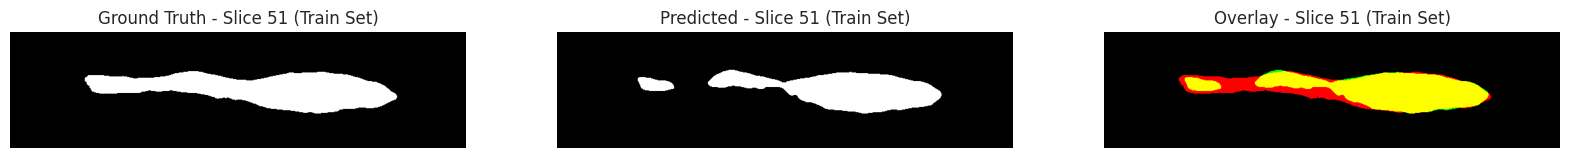

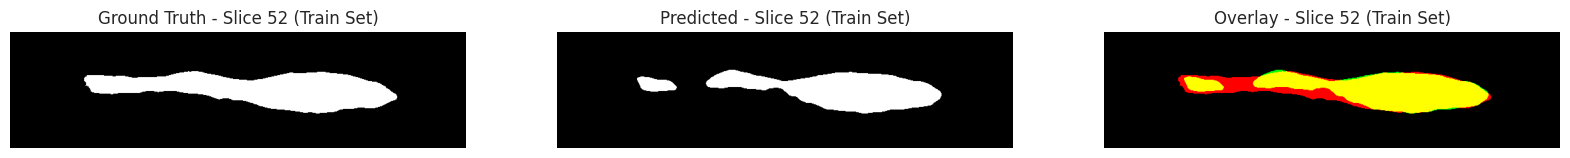

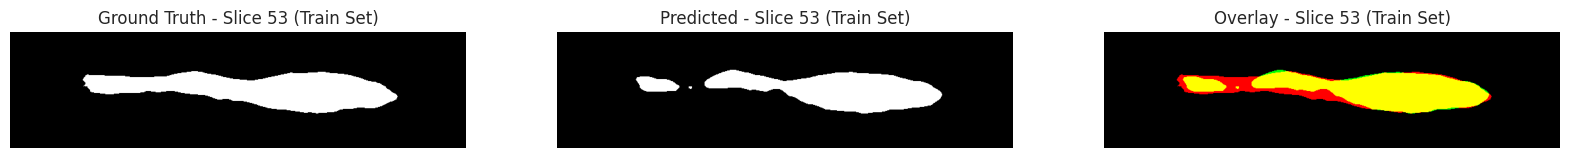

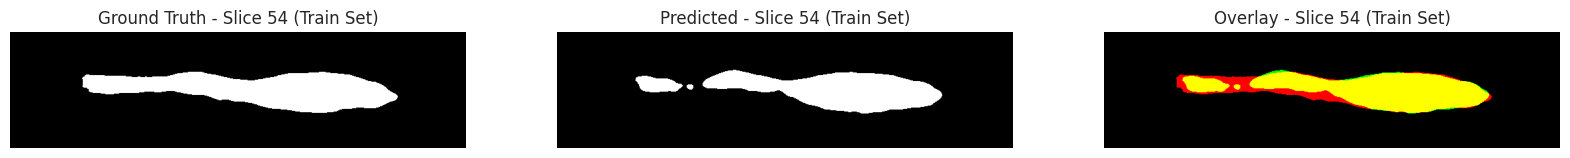

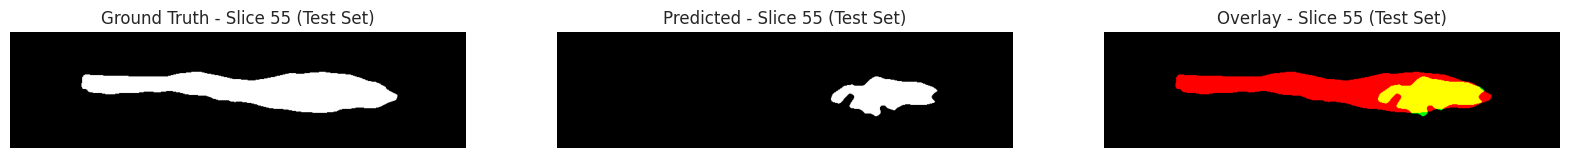

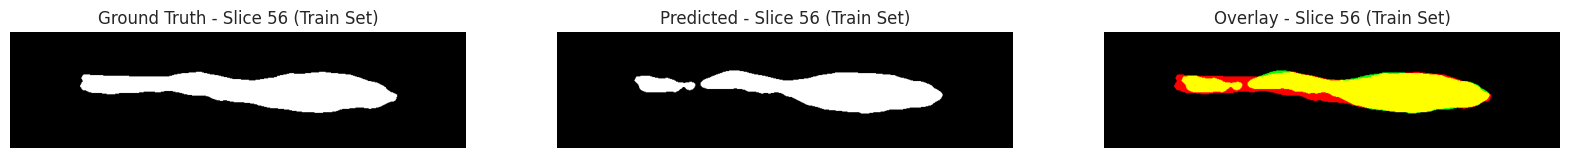

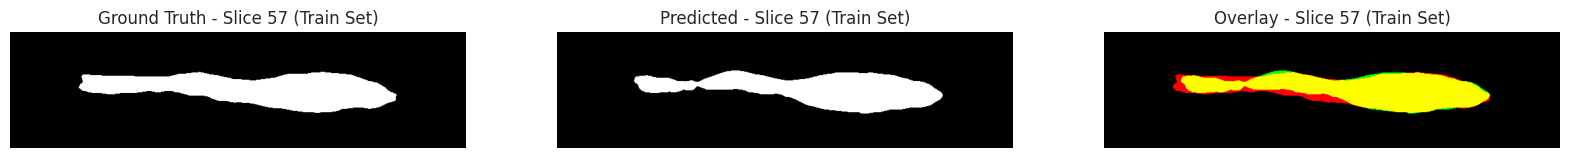

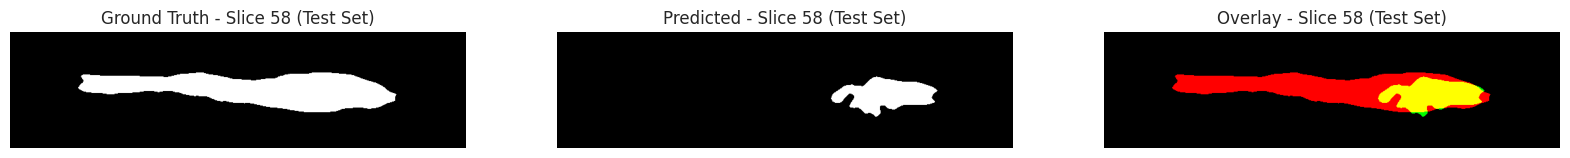

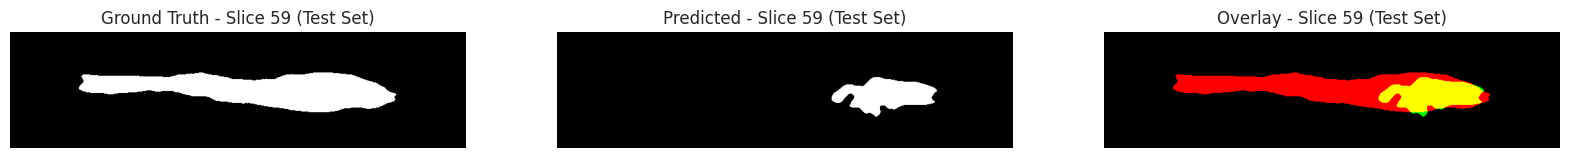

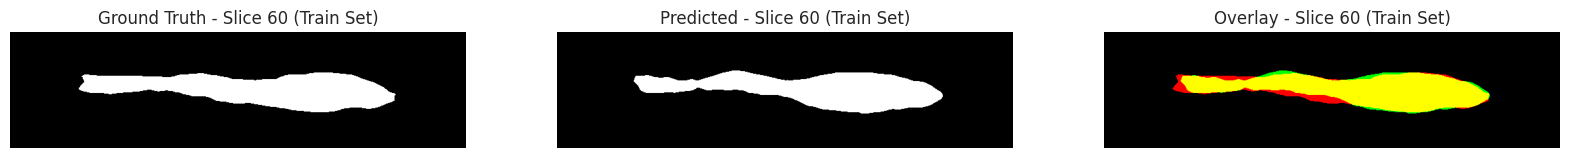

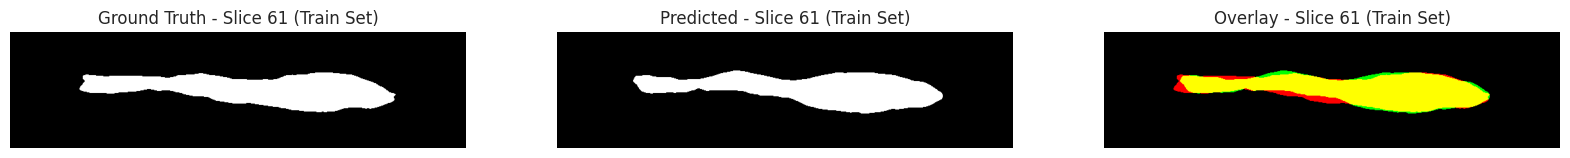

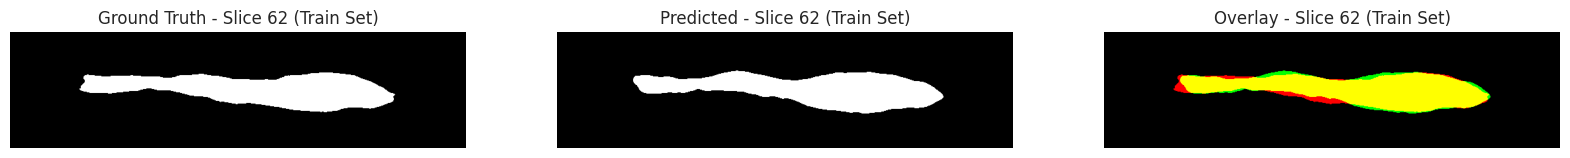

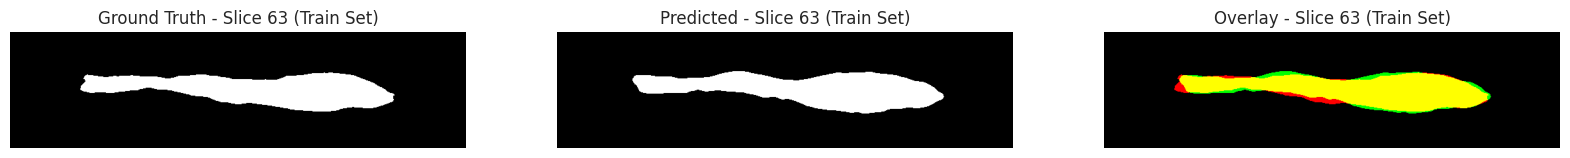

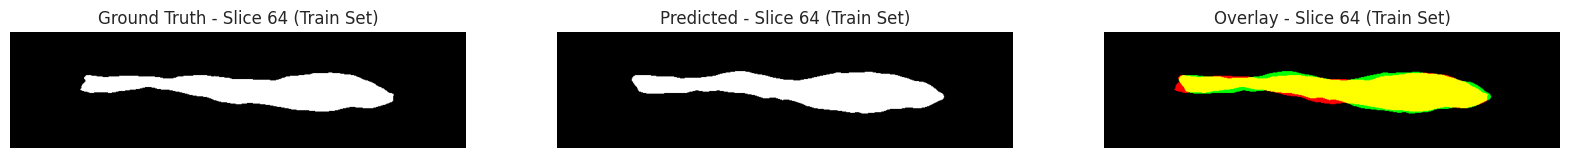

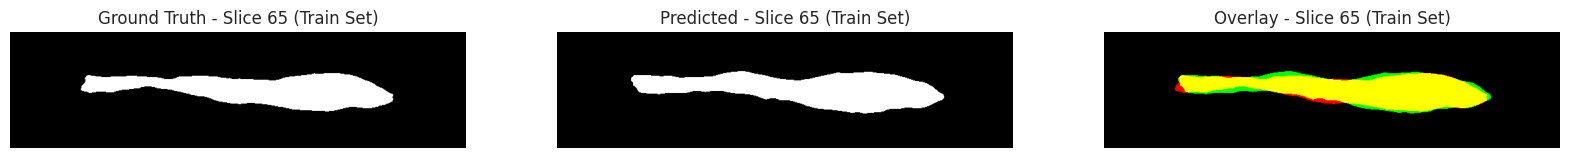

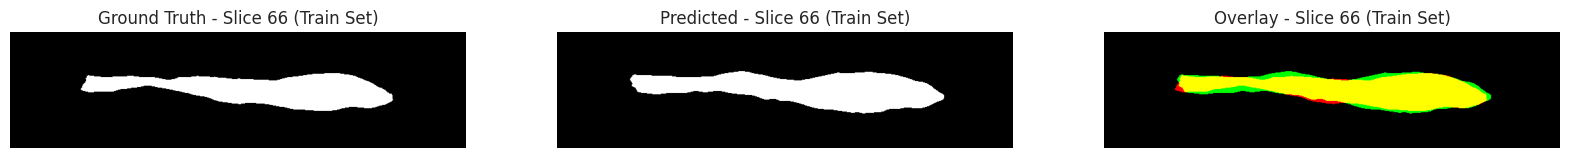

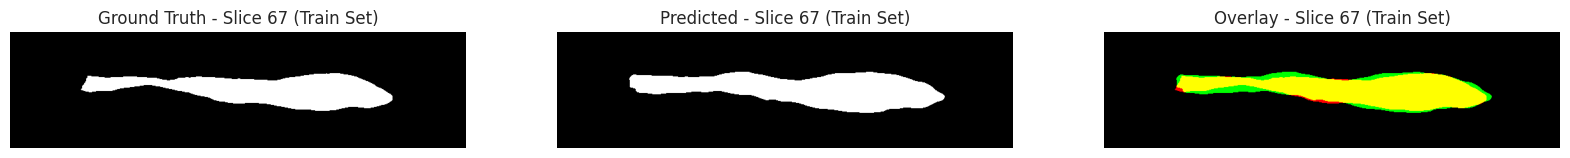

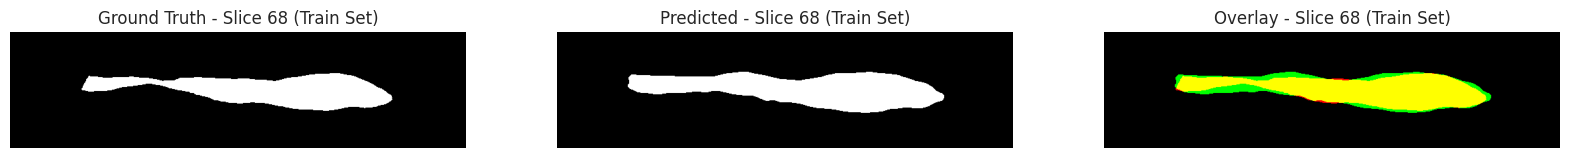

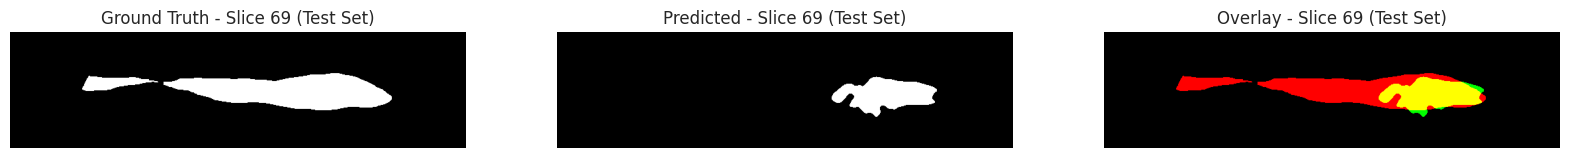

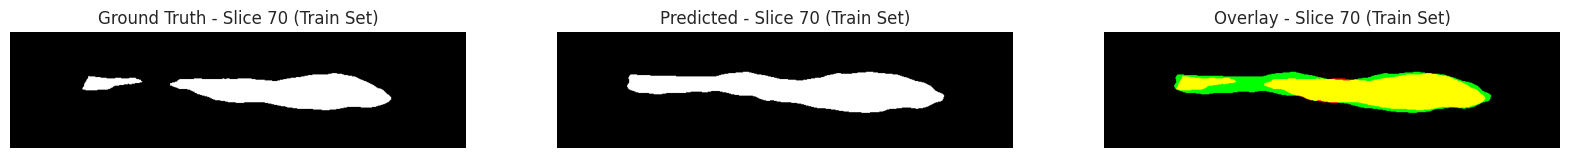

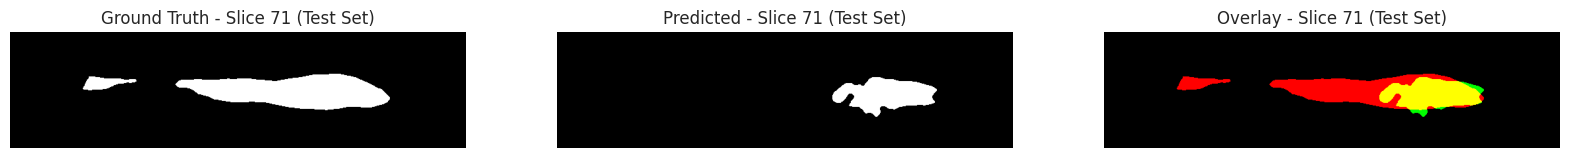

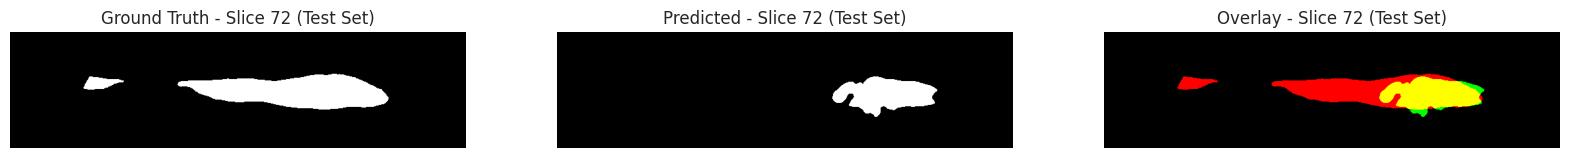

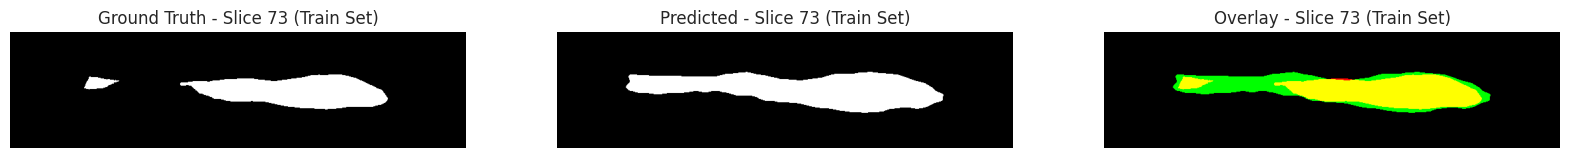

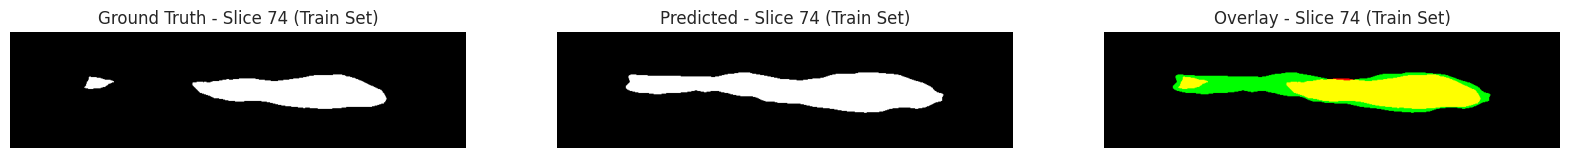

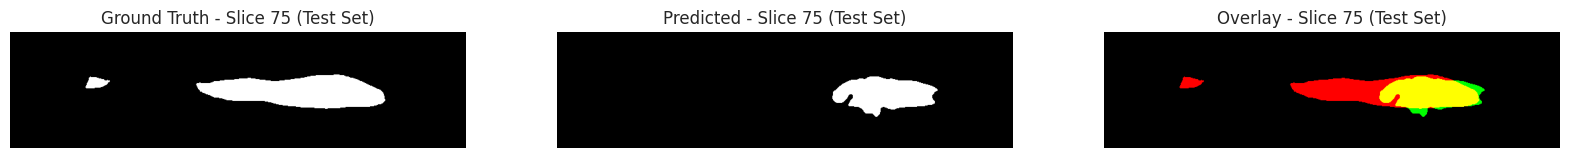

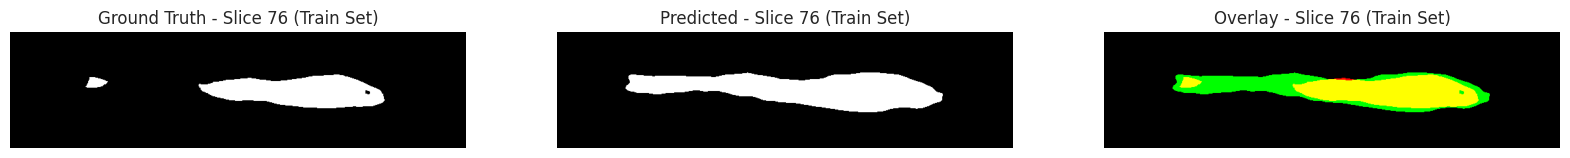

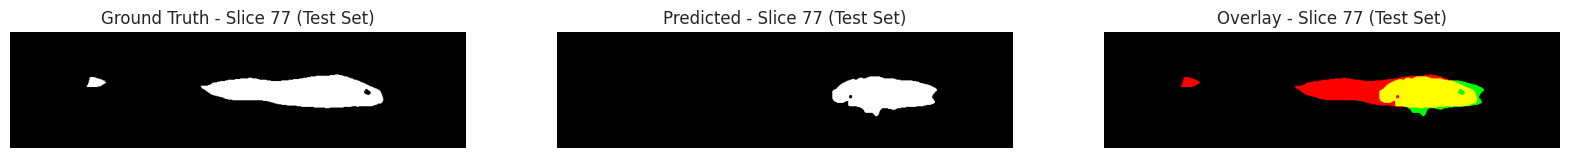

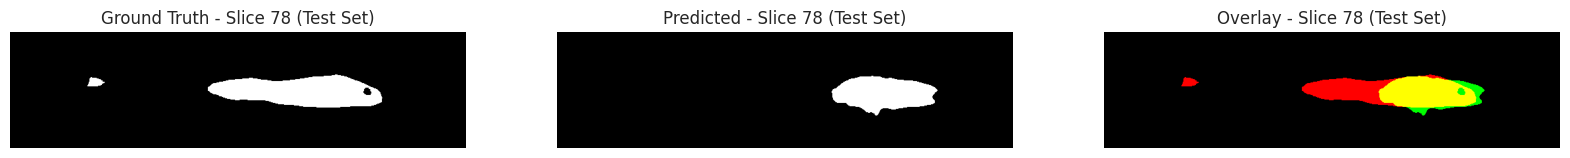

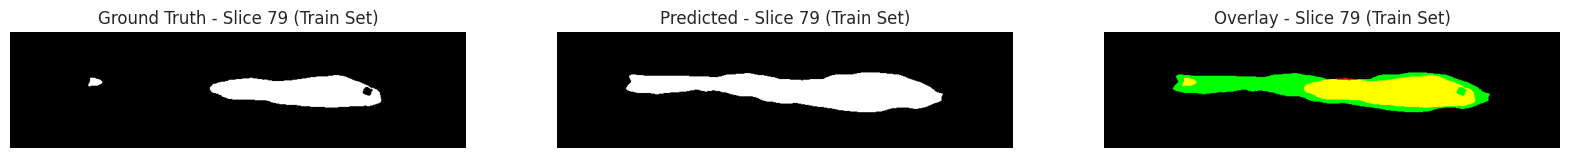

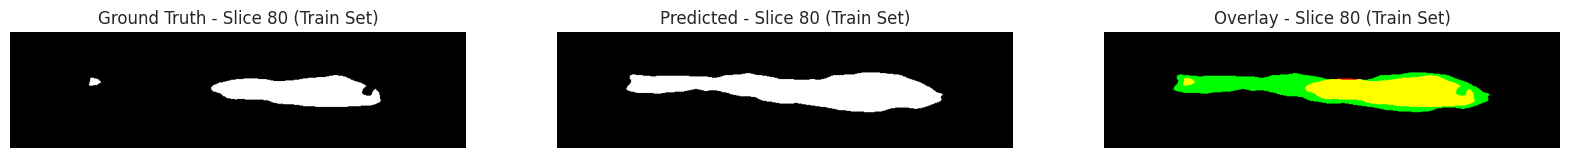

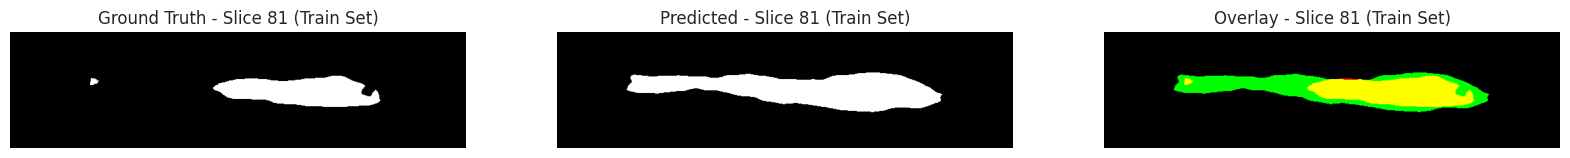

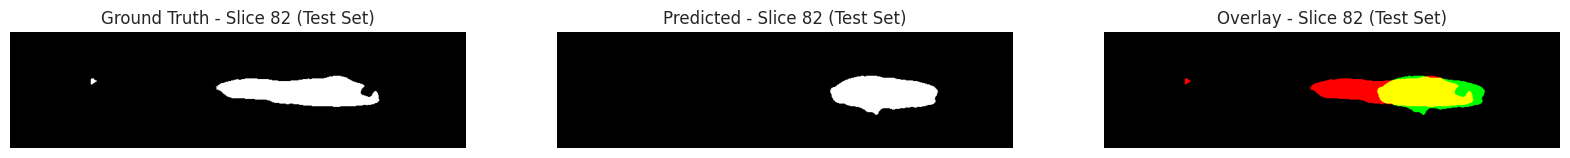

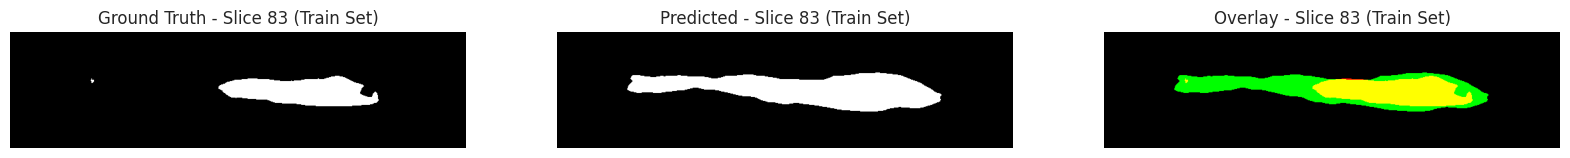

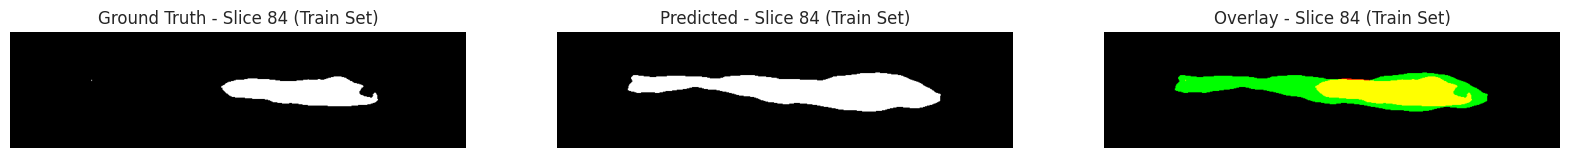

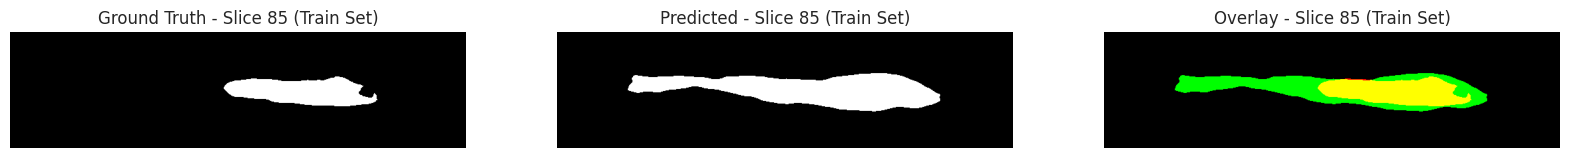

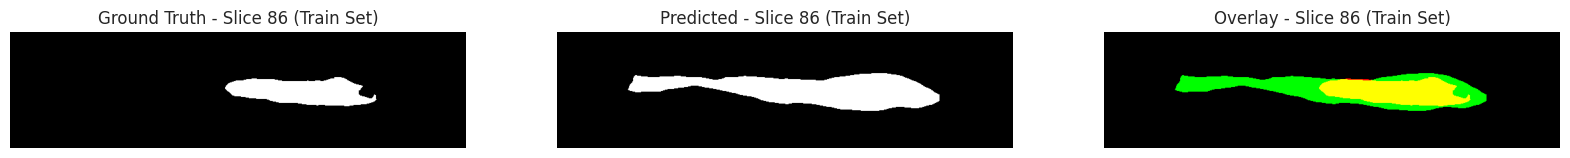

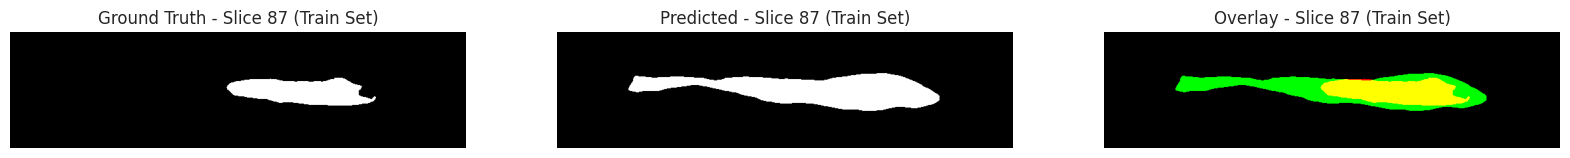

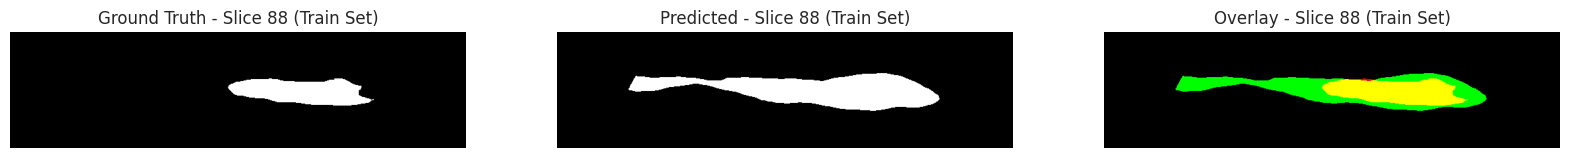

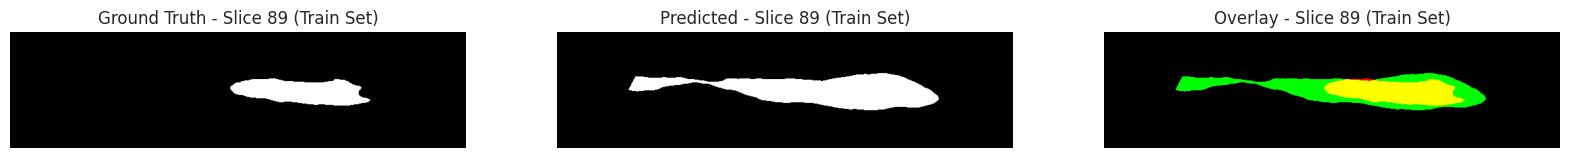

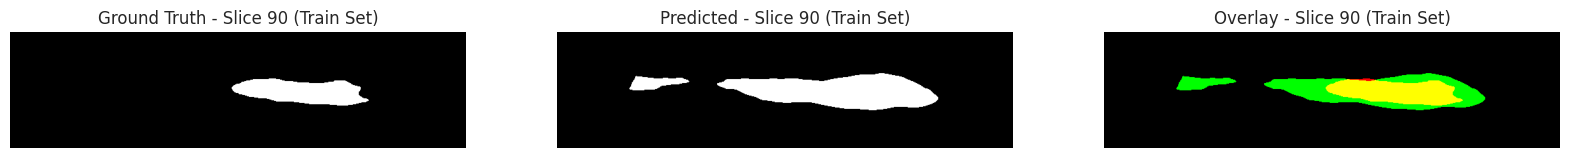

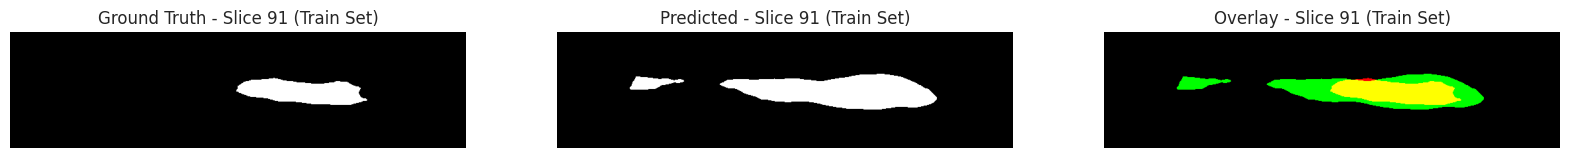

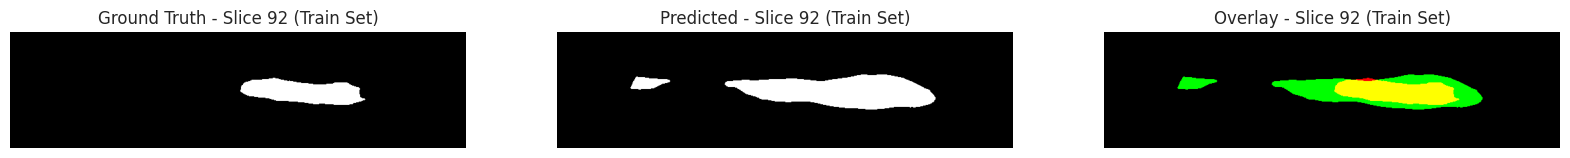

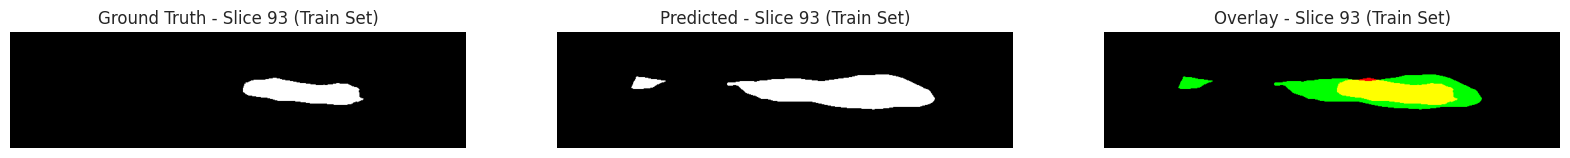

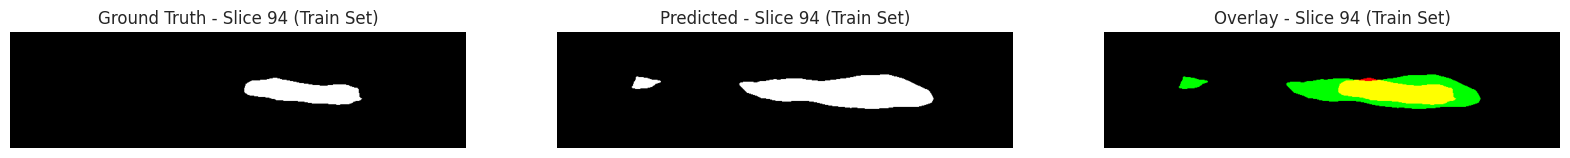

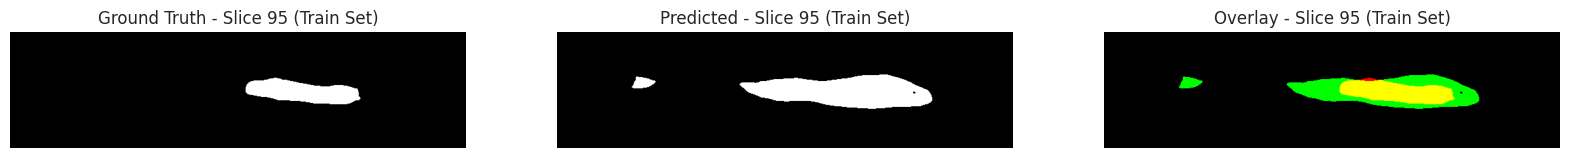

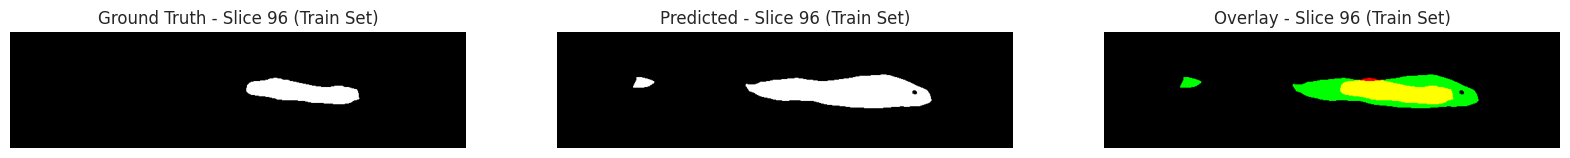

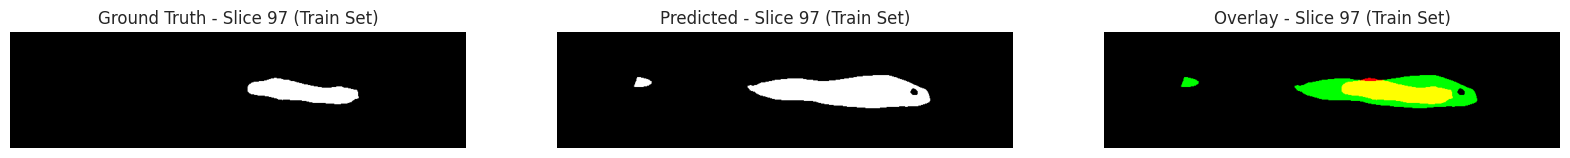

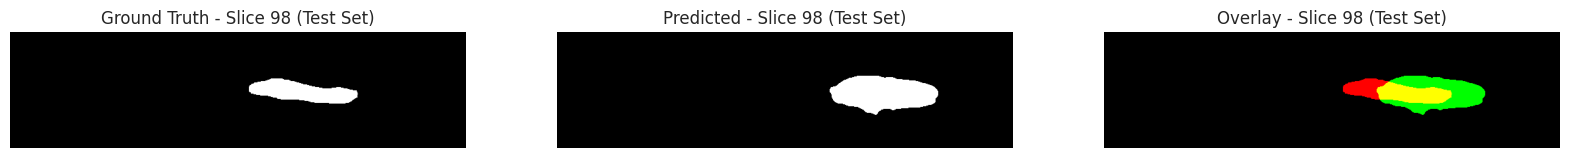

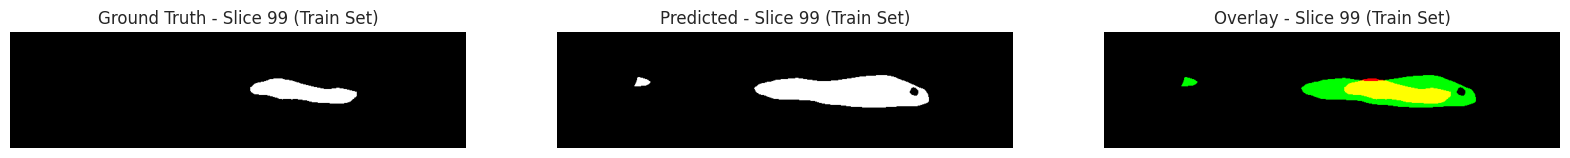

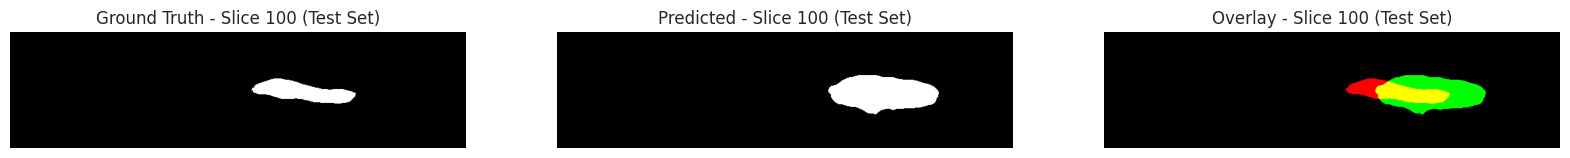

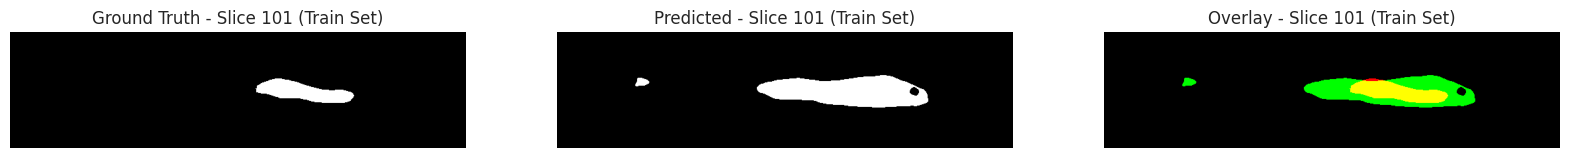

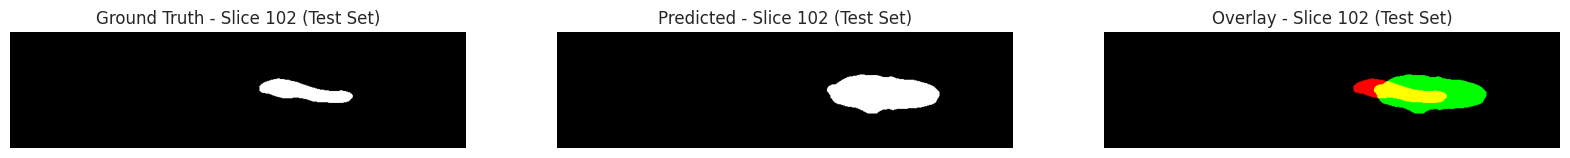

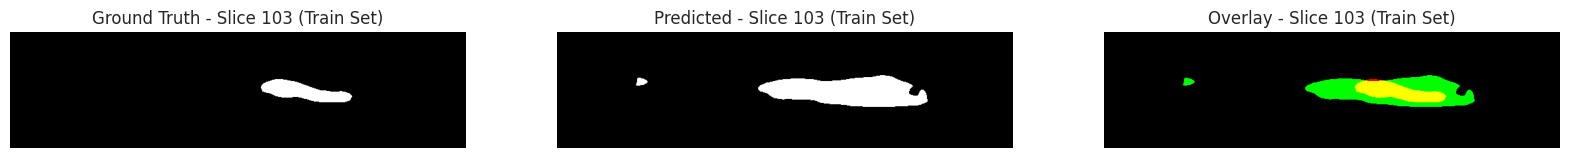

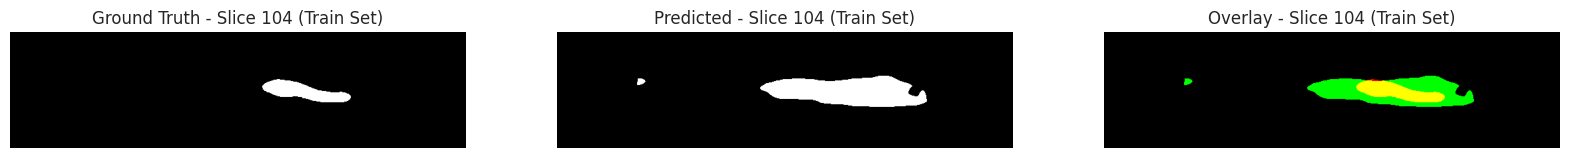

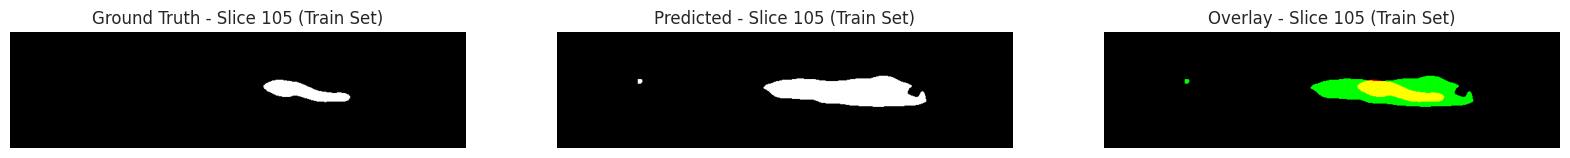

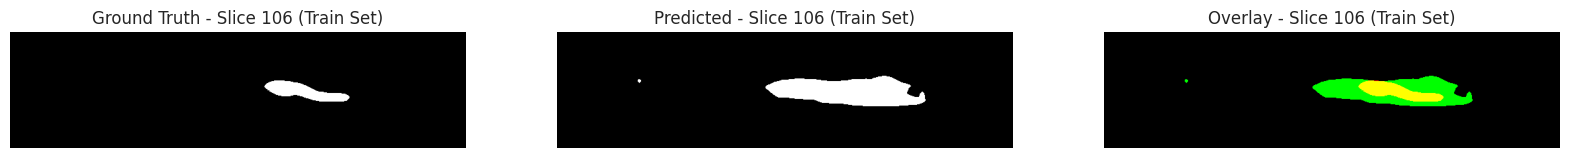

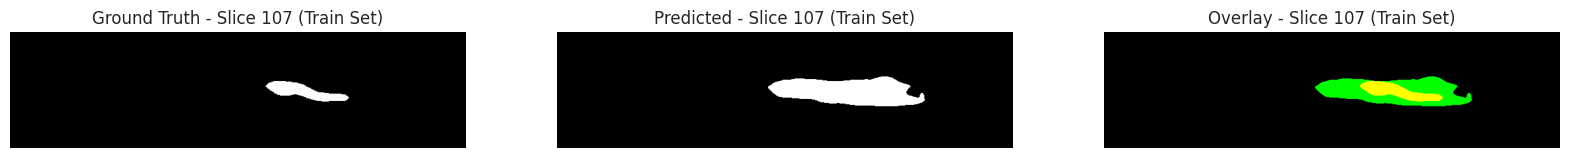

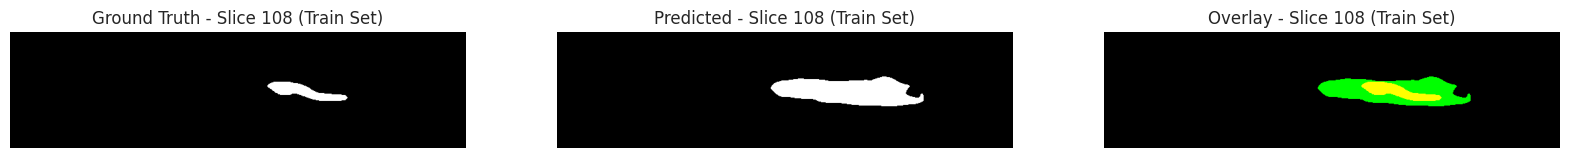

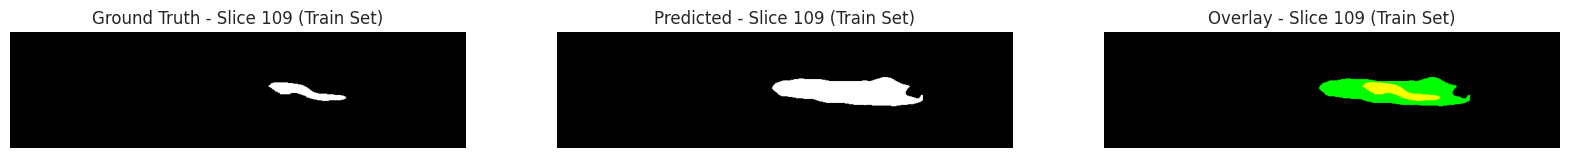

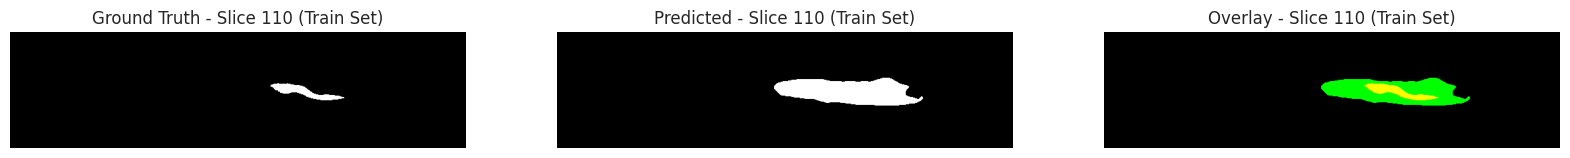

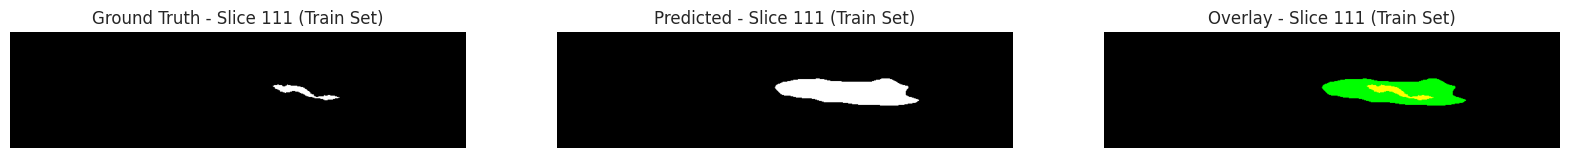

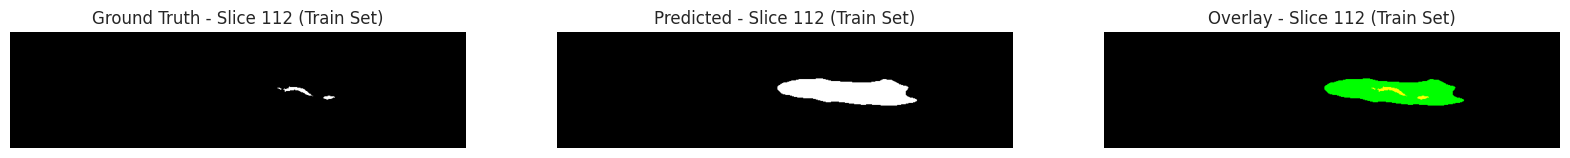

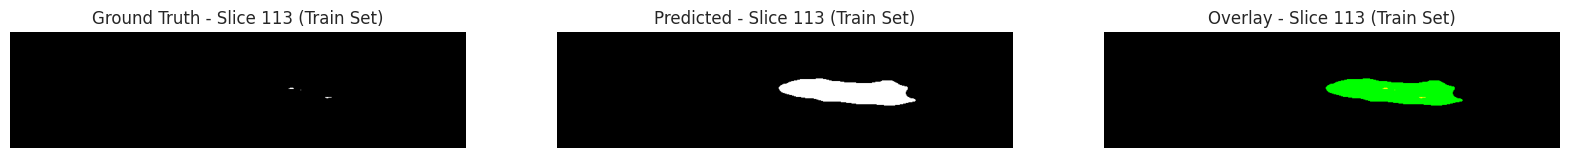

/tmp/ipykernel_422919/772571365.py:15: RuntimeWarning: invalid value encountered in divide
  normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
/tmp/ipykernel_422919/772571365.py:16: RuntimeWarning: invalid value encountered in cast
  return normalized_image.astype(np.uint8)


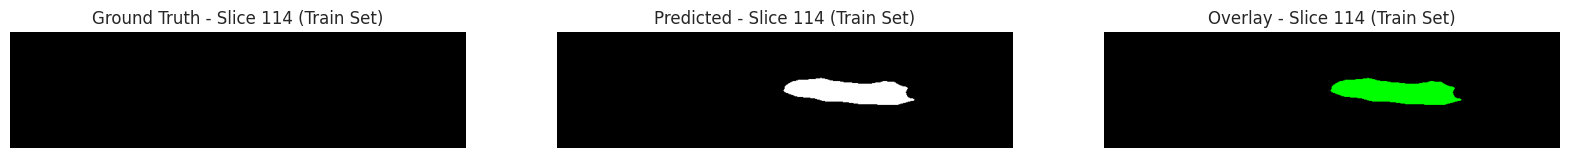

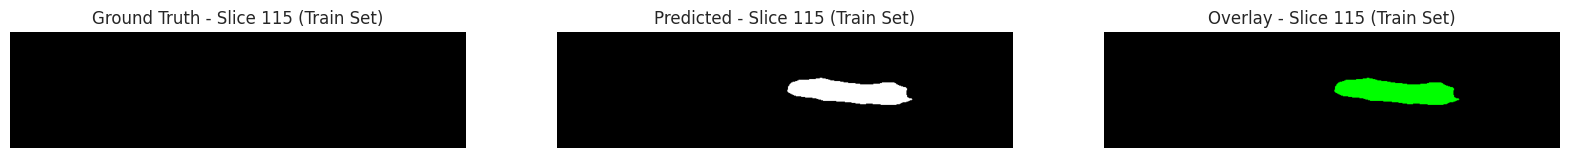

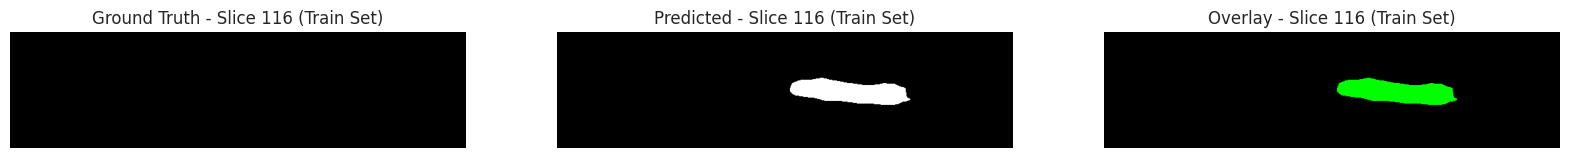

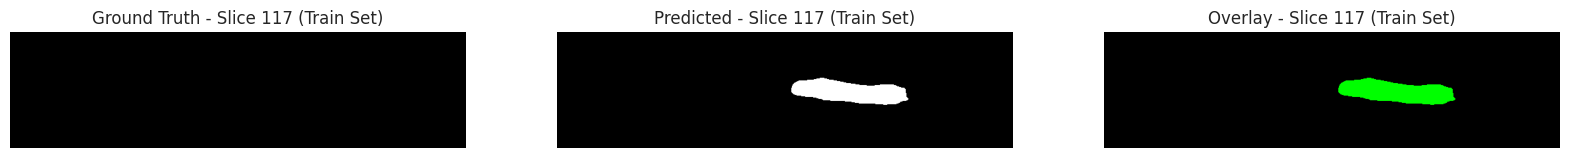

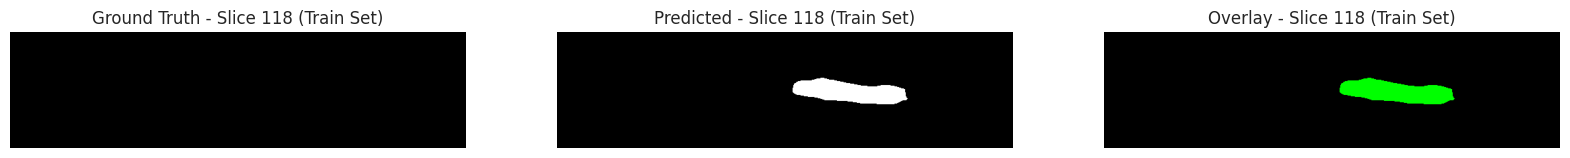

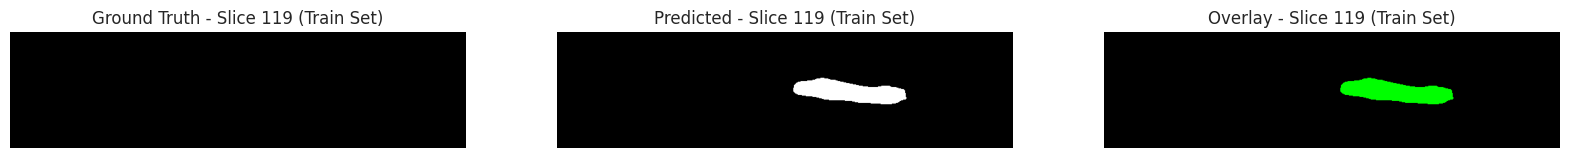

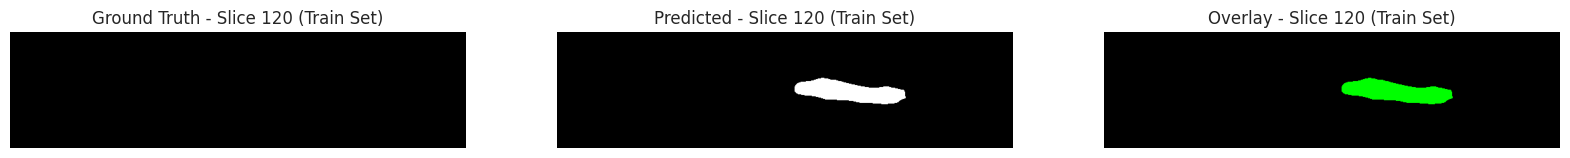

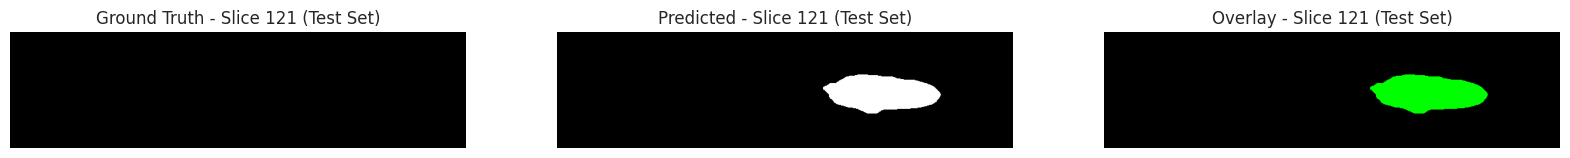

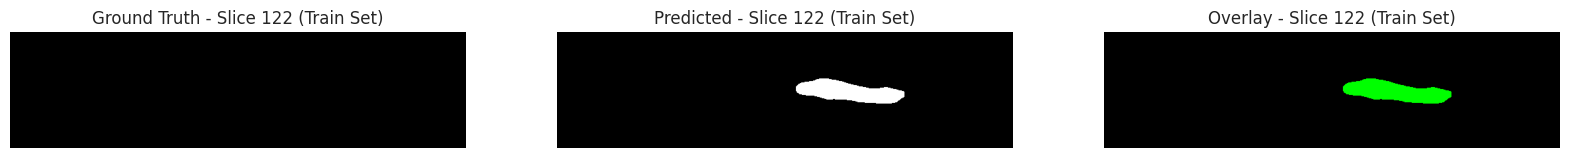

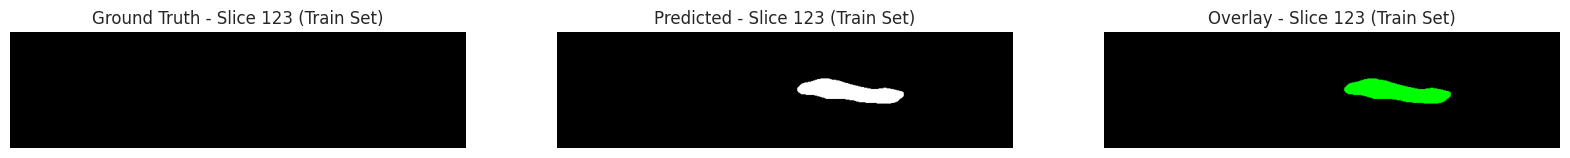

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load image using PIL and convert to numpy array."""
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

def normalize_image(image):
    """Normalize the image to the range 0-255."""
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return normalized_image.astype(np.uint8)

def overlay_images(image1, image2):
    """Overlay two images with different colors."""
    # Ensure images are of the same shape
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions.")
    
    # Normalize images to ensure proper contrast
    image1 = normalize_image(image1)
    image2 = normalize_image(image2)
    
    # Convert images to RGB if they are grayscale
    if len(image1.shape) == 2:
        image1 = np.stack((image1,) * 3, axis=-1)
    if len(image2.shape) == 2:
        image2 = np.stack((image2,) * 3, axis=-1)
    
    # Create a blank image with the same dimensions
    overlay = np.zeros_like(image1)
    
    # Assign red color to ground truth and green color to predictions
    overlay[:, :, 0] = image1[:, :, 0]  # Red channel
    overlay[:, :, 1] = image2[:, :, 1]  # Green channel
    
    return overlay

def display_overlay_images(csv_path):
    """Display overlay images from the paths listed in the CSV."""
    # Load CSV file
    df = pd.read_csv(csv_path)
    
    # Iterate through rows starting from row 125
    for _, row in df.iloc[124:].iterrows():
        slice_number = row['Slice Number']
        set_type = row['Set']
        image_path1 = row['Path']
        
        # Construct the corresponding predicted image path based on folder structure
        base_filename = os.path.basename(image_path1)
        pred_folder = f'/argusdata/users/undergrads/ItamarAndDafna/nnUNet/nnUNet_results/{dataset_name}/TrPlusTs_4_folds_250ep/'
        image_path2 = os.path.join(pred_folder, base_filename)
        
        # Ensure the predicted image exists
        if not os.path.exists(image_path2):
            print(f"Predicted image {image_path2} does not exist.")
            continue
        
        # Load images
        image1 = load_image(image_path1)
        image2 = load_image(image_path2)
        
        # Overlay images
        overlay = overlay_images(image1, image2)
        
        # Display images
        plt.figure(figsize=(20, 20))  # Increase figure size
        plt.subplot(1, 3, 1)
        plt.imshow(image1, cmap='gray')
        plt.title(f'Ground Truth - Slice {slice_number} ({set_type} Set)')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(image2, cmap='gray')
        plt.title(f'Predicted - Slice {slice_number} ({set_type} Set)')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(overlay)
        plt.title(f'Overlay - Slice {slice_number} ({set_type} Set)')
        plt.axis('off')
        
        plt.show()

# Example usage:
csv_path = r'/argusdata/users/undergrads/ItamarAndDafna/slicing_info/split_records_Dataset030_1030GlyRM1.csv'  # Update with the actual path to your CSV file
display_overlay_images(csv_path)


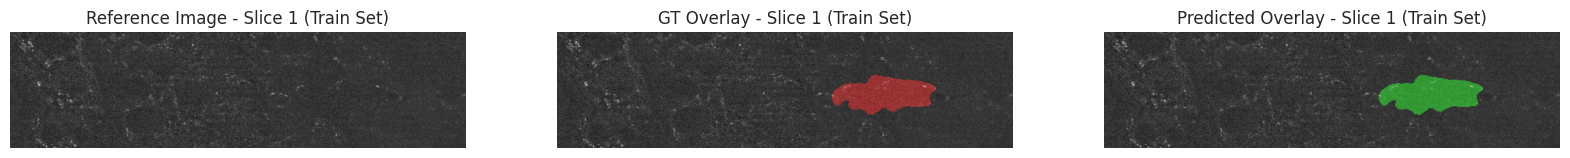

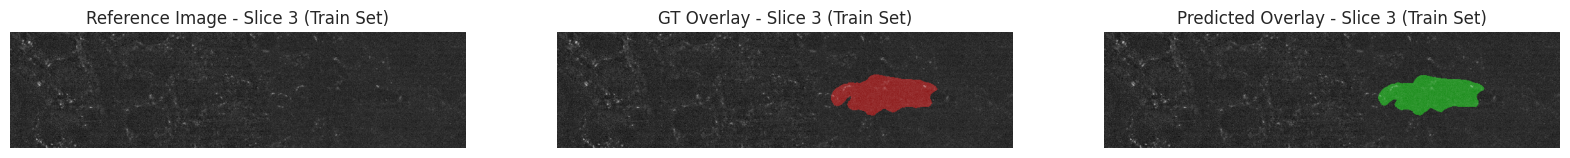

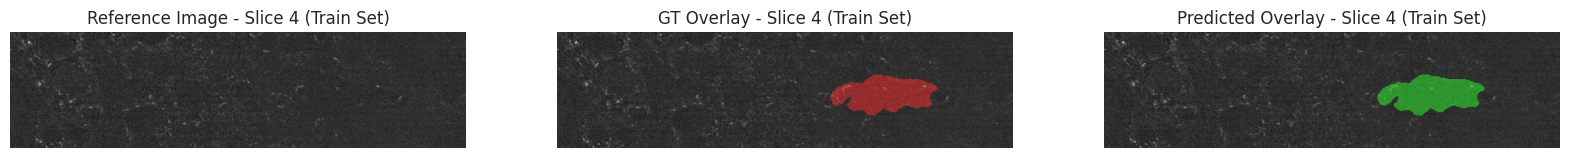

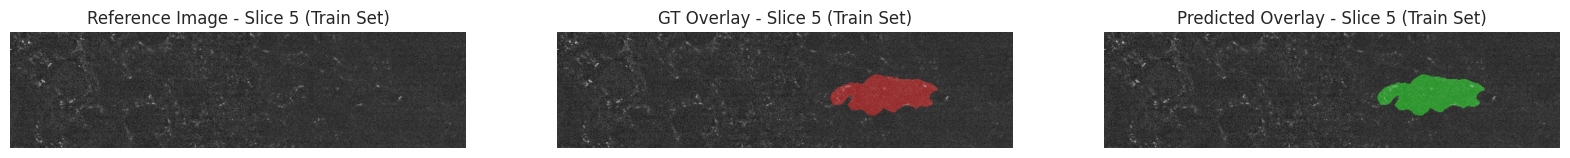

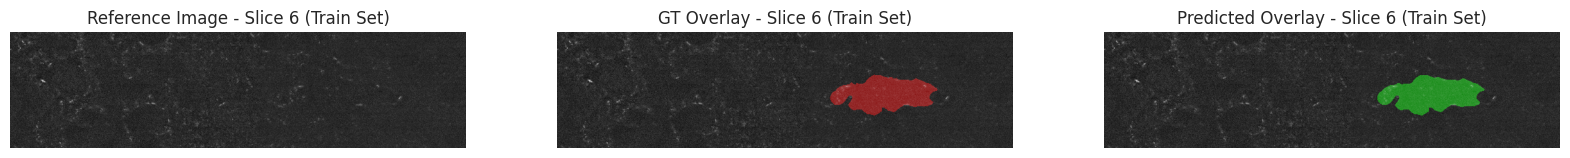

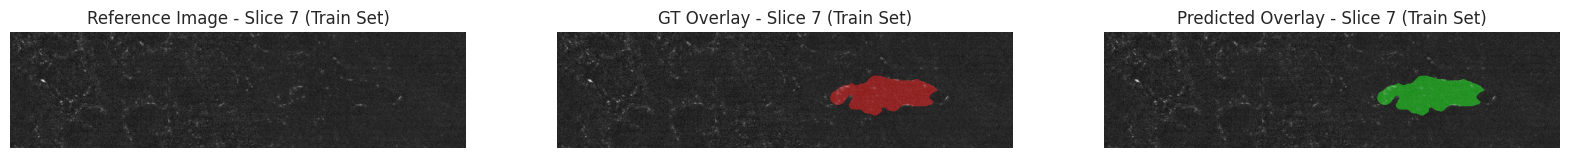

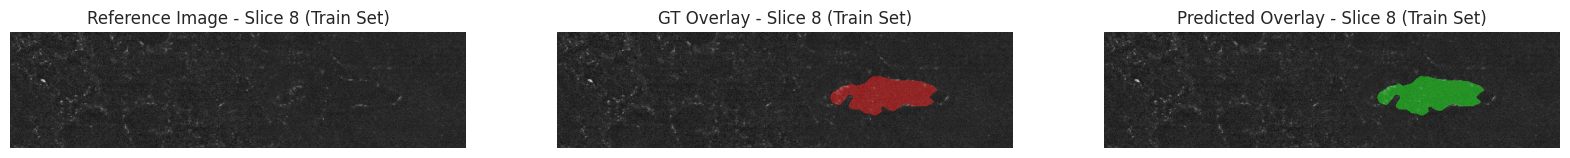

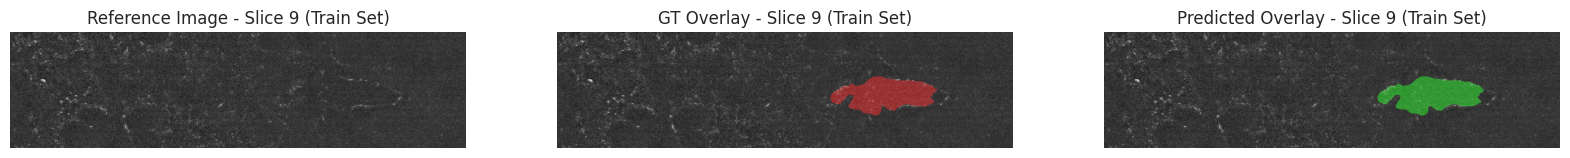

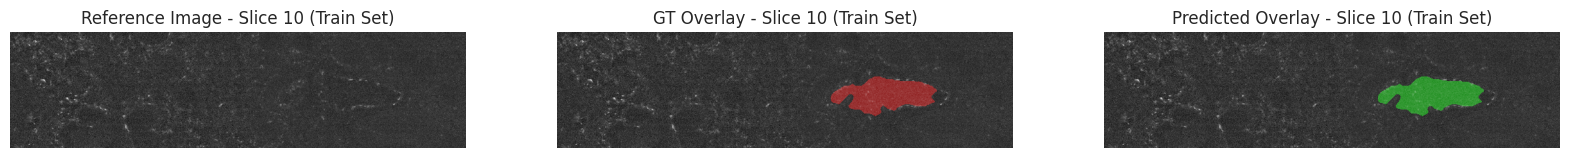

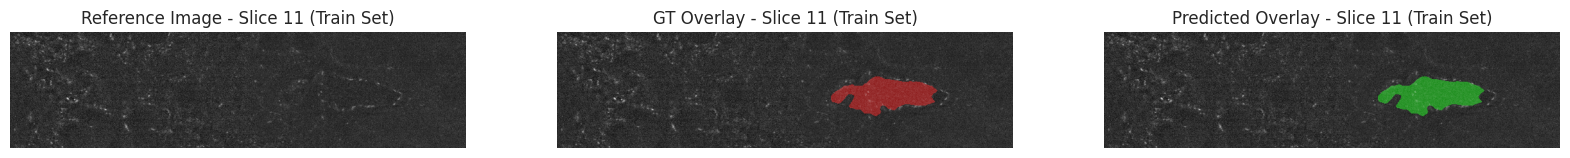

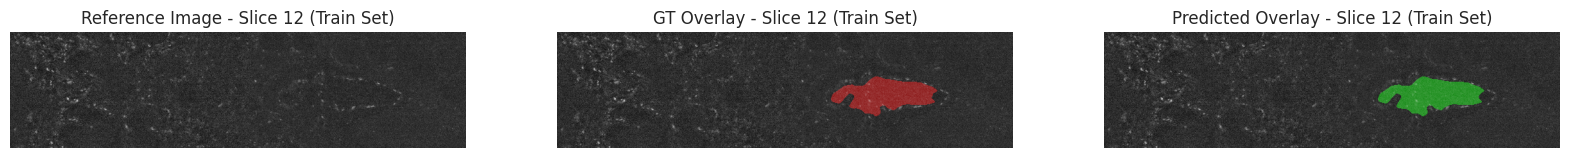

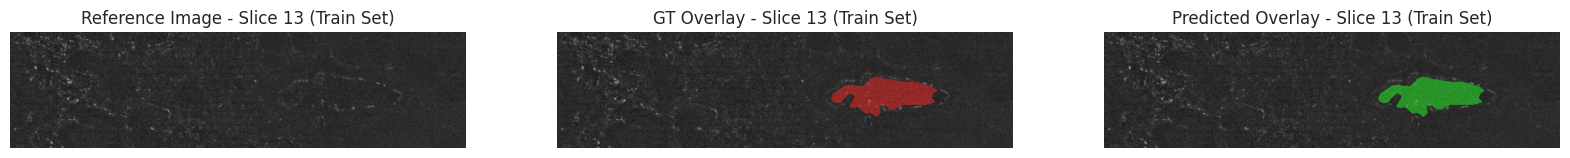

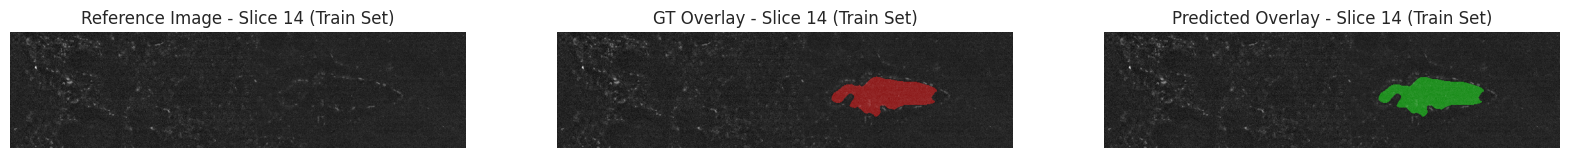

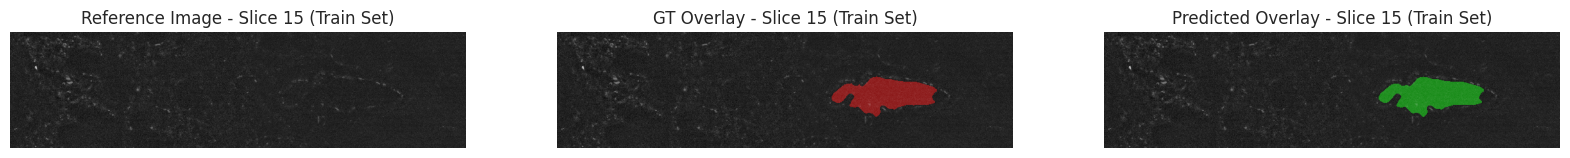

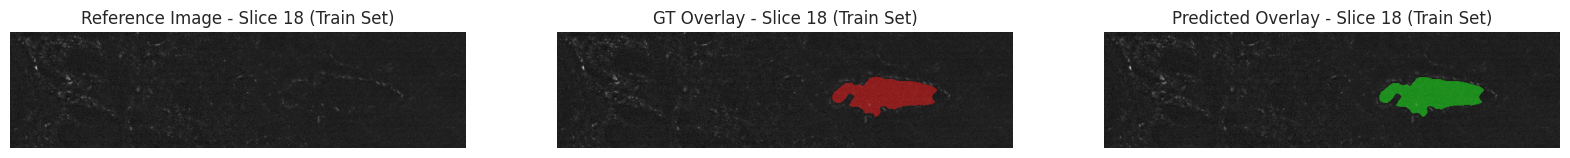

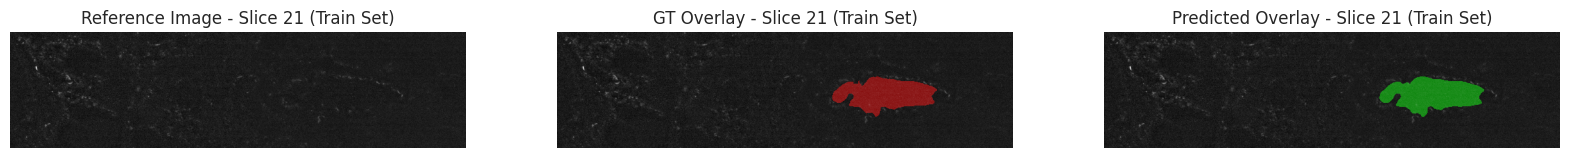

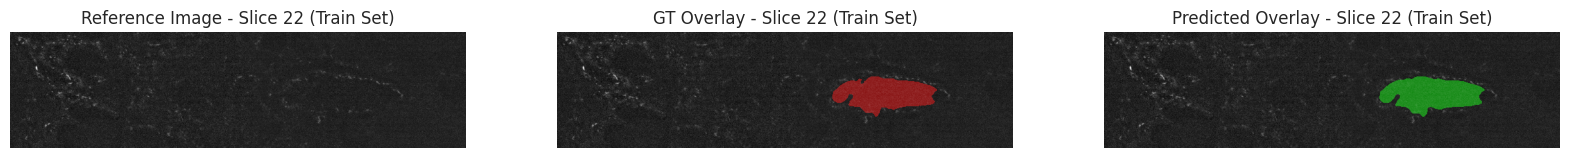

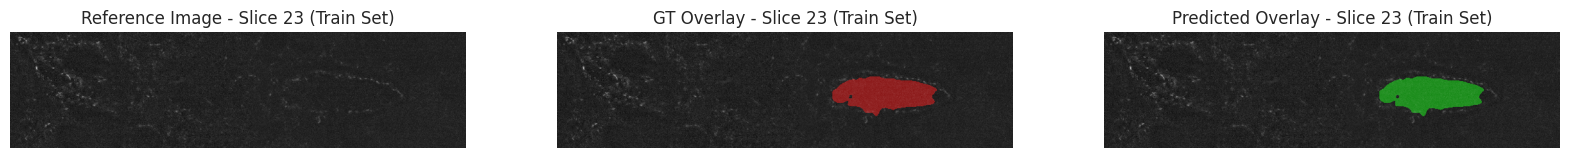

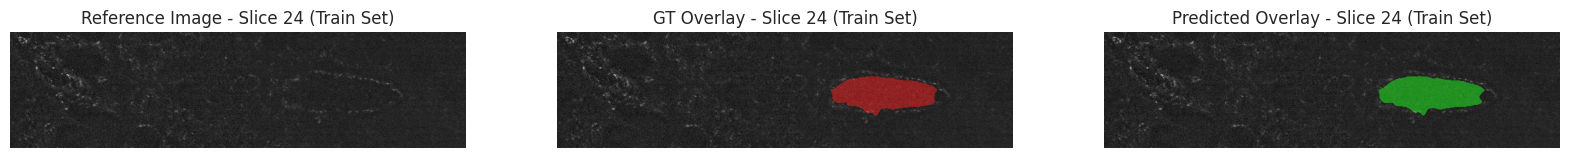

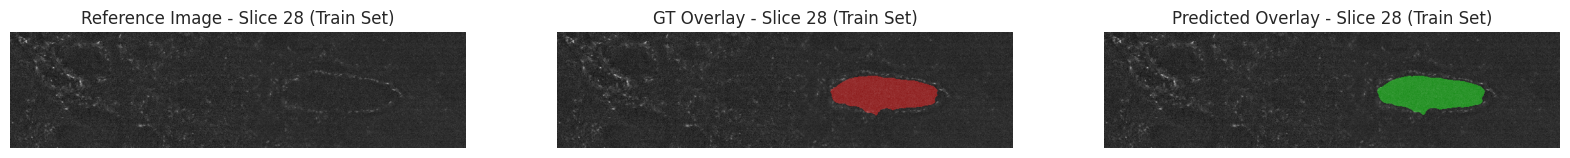

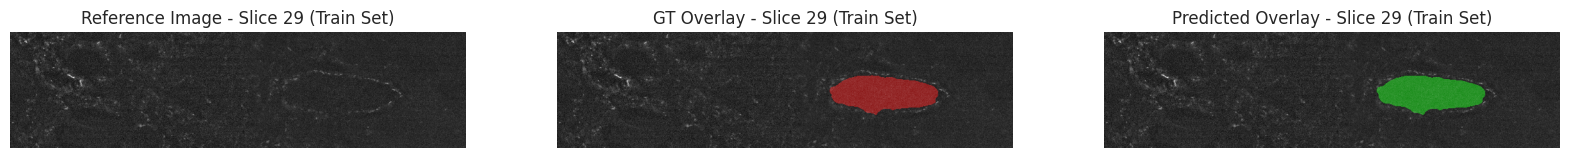

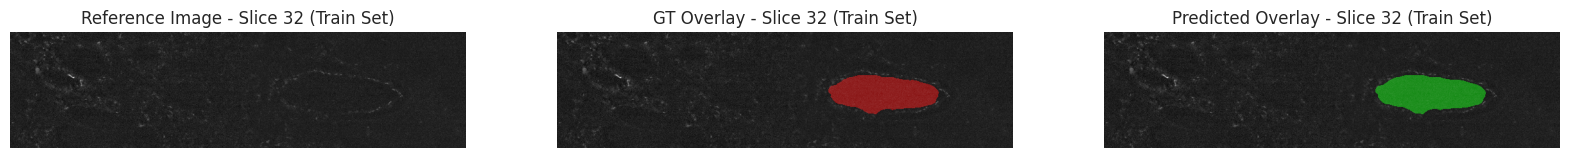

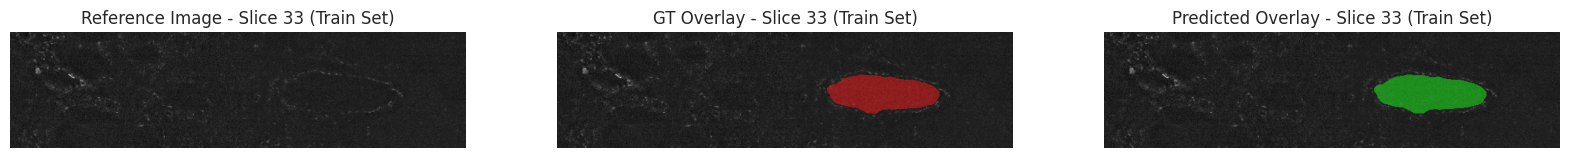

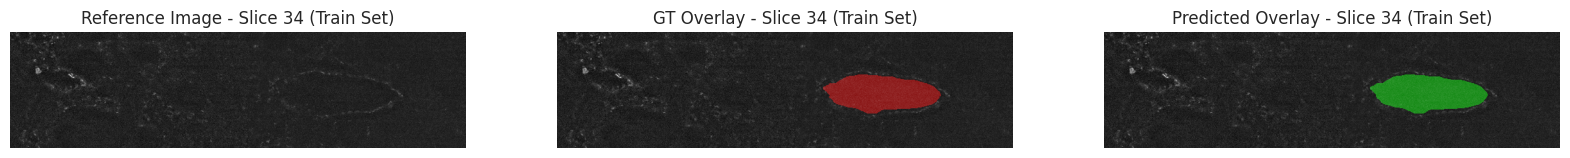

KeyboardInterrupt: 

In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load image using PIL and convert to numpy array."""
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

def normalize_image(image):
    """Normalize the image to the range 0-255."""
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return normalized_image.astype(np.uint8)

def overlay_gt_image(gt_image, ref_image, transparency=0.3):
    """Overlay GT image on top of reference image."""
    # Normalize images
    gt_image = normalize_image(gt_image)
    ref_image = normalize_image(ref_image)
    
    # Create overlay with GT in red
    if len(ref_image.shape) == 2:  # If reference image is grayscale
        overlay = np.stack([ref_image] * 3, axis=-1)  # Convert grayscale to RGB
    else:
        overlay = ref_image.copy()
    
    # Mask where GT exists and assign red color with transparency
    mask = gt_image > 0
    overlay[mask, 0] = (1 - transparency) * overlay[mask, 0] + transparency * 255  # Red channel with transparency
    
    return overlay

def overlay_pred_image(pred_image, ref_image, transparency=0.3):
    """Overlay predicted image on top of reference image."""
    # Normalize images
    pred_image = normalize_image(pred_image)
    ref_image = normalize_image(ref_image)
    
    # Create overlay with predicted in green
    if len(ref_image.shape) == 2:  # If reference image is grayscale
        overlay = np.stack([ref_image] * 3, axis=-1)  # Convert grayscale to RGB
    else:
        overlay = ref_image.copy()
    
    # Mask where predicted exists and assign green color with transparency
    mask = pred_image > 0
    overlay[mask, 1] = (1 - transparency) * overlay[mask, 1] + transparency * 255  # Green channel with transparency
    
    return overlay

def display_overlay_images_with_reference(gt_folder, pred_folder, ref_folder, csv_path, transparency=0.3):
    """Display overlay images from two folders with a reference image and add titles from CSV."""
    # Get list of TIF files in each folder
    tif_files1 = sorted([f for f in os.listdir(gt_folder) if f.lower().endswith('.tif')])
    tif_files2 = sorted([f for f in os.listdir(pred_folder) if f.lower().endswith('.tif')])
    
    # Check if number of TIFF files match
    if len(tif_files1) != len(tif_files2):
        raise ValueError("Number of TIFF files in the two folders do not match.")
    
    # Load CSV file
    df = pd.read_csv(csv_path)
    
    # Iterate through TIFF files and display overlay images
    for file1, file2 in zip(tif_files1, tif_files2):
        if file1 != file2:
            raise ValueError("Files in the two folders do not match.")
        
        # Construct full file paths for TIFF files
        gt_image_path = os.path.join(gt_folder, file1)
        pred_image_path = os.path.join(pred_folder, file2)
        
        # Extract base filename from file1 (assuming it's the same for both gt and pred)
        base_filename = os.path.splitext(file1)[0]  # Remove extension
        
        # Initialize ref_image to None
        ref_image = None
        
        # Iterate over sequence numbers for ref images
        sequence_number = 0
        while True:
            ref_filename = f"{base_filename}_{sequence_number:04d}.tif"
            ref_image_path = os.path.join(ref_folder, ref_filename)
            
            if not os.path.exists(ref_image_path):
                break
            
            # Load ref image
            ref_image = load_image(ref_image_path)
            
            # Overlay images
            gt_image = load_image(gt_image_path)
            pred_image = load_image(pred_image_path)
            
            overlay_gt = overlay_gt_image(gt_image, ref_image, transparency)
            overlay_pred = overlay_pred_image(pred_image, ref_image, transparency)
            
            # Get the title from the CSV
            title_row = df[df['Path'].str.contains(file1, case=False)]
            if not title_row.empty:
                slice_number = title_row.iloc[0]['Slice Number']
                set_type = title_row.iloc[0]['Set']
            else:
                slice_number = "Unknown"
                set_type = "Unknown"
            
            # Display images
            plt.figure(figsize=(20, 10))  # Increase figure size
            
            plt.subplot(1, 3, 1)
            plt.imshow(ref_image, cmap='gray')
            plt.title(f'Reference Image - Slice {slice_number} ({set_type} Set)')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(overlay_gt)
            plt.title(f'GT Overlay - Slice {slice_number} ({set_type} Set)')
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            plt.imshow(overlay_pred)
            plt.title(f'Predicted Overlay - Slice {slice_number} ({set_type} Set)')
            plt.axis('off')
            
            plt.show()
            
            sequence_number += 1

# Example usage:
dataset_name = 'Dataset030_1030GlyRM1'
gt_folder = r'/argusdata/users/undergrads/ItamarAndDafna/nnUNet/nnUNet_raw/Dataset031_1030GlyRM1_noSplit/labelsTs/'
pred_folder = f'/argusdata/users/undergrads/ItamarAndDafna/nnUNet/nnUNet_results/{dataset_name}/TrPlusTs_4_folds_250ep/'
ref_folder = r"/argusdata/users/undergrads/ItamarAndDafna/nnUNet/nnUNet_raw/Dataset031_1030GlyRM1_noSplit/imagesTs/"  # Update with the actual path to your reference images
csv_path = r'/argusdata/users/undergrads/ItamarAndDafna/slicing_info/split_records_Dataset030_1030GlyRM1.csv'  # Update with the actual path to your CSV file

display_overlay_images_with_reference(gt_folder, pred_folder, ref_folder, csv_path, transparency=0.5)
